## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*TODO*


For a red wine quality prediction project, the analytical approach typically involves several key steps:

1. Data Understanding : 

2. Data Preprocessing:

3. Exploratory Data Analysis (EDA):

4. Feature Selection :

5. Model Selection and Training:

6. Feature scaling :

7. Model Evaluation:

8. Hyperparameter Tuning:

9. Model Interpretation:

10. Deployment and Monitoring:


### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*TODO*

Need a dataset that includes input attributes and matching quality ratings for red wines in order to forecast red wine quality and identify the aspects that are the best quality red wine indicators. 

### Data Collection

**Q3. From where do we get our data?**

*TODO*

We can get the data from Public Datasets, which are publicly available and also from red wine producers.
For these project wine dataset is available on many websites.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*TODO*

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*TODO*

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

For companies in the wine industry, such as producers, distributors, retailers, and consumers, knowing the impact of each factor on the quality of red wine can be very helpful.

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

## Import Important Lib for project.

In [18]:
import warnings
warnings.filterwarnings('ignore')

The warnings module to suppress the display of warning messages during program execution. 
Specifically, this means that any warning messages that would typically be displayed during program execution will be suppressed and not shown to the user.

In [19]:
import pandas as pd
import numpy as np

###### Why pandas and numpy imported ?
Pandas - is an open-source data manipulation and analysis library for Python. It provides data structures for efficiently storing and manipulating large datasets, as well as tools for working with structured data.

Numpy - is a powerful library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on arrays efficiently.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="whitegrid", color_codes=True, palette="dark" )

###### Matplotlib and Seaborn
Matplotlib - a popular plotting library in Python, use to demonstrate the data.

%matplotlib inline : command for Jupyter notebooks to ensures that Matplotlib plots are displayed directly below the code cell in which they are generated.

Seaborn - is built on top of Matplotlib and provides a high-level interface for creating attractive statistical graphics.

When you set color_codes=True, Seaborn interprets color codes as named colors, making it easier to use color names like 'red', 'blue', 'green', etc., instead of specifying RGB value, and set the style (types of style in seaborn:white,dark,whitegrid,darkgrid,ticks)

In [21]:
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
import time

from sklearn.metrics import mean_squared_error, r2_score

###### Why imported above mention library?

To carry out statistical analysis, machine learning, and model evaluation, the code imports a number of modules and methods from well-known Python libraries.


# Exploratory Data Analysis (EDA)

###### Used pandas library to read data from an Excel file named "winequality-red.csv'" and store it in a variable called "red_wine". 
The head() function is used to display the first few rows of the DataFrame.(Provides a quick look at the structure and contents of the dataset.)


In [22]:
red_wine = pd.read_csv("winequality-red.csv")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The above code is using the pandas library to read data from an Excel file named "iris.xlsx" into a DataFrame called iris. 

The "head()" method is used to display the first few rows of the DataFrame, providing a quick overview of the dataset's structure and content.

### Check for missing values and handle if any

In [24]:
red_wine.shape

(1599, 12)

The "iris.shape" is used to get dimensions, and for understanding the size of dataset

Where the first element is the number of rows, and the second element is the number of columns in the DataFrame. 

For example, the result is (1599, 12), it means there are 1599 rows and 12 columns in the iris DataFrame.


In [25]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The "red_wine.info()" provides a short summary of the DataFrame iris, and to get a quick understanding of the dataset's structure, data types, and whether there are any missing values in the data set.

By providing information regarding :
The total number of entries (rows), data types of each column, number of non-null values in each column, and memory usage.

In [26]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

"red_wine.isnull().sum()" is used to get the count of the null/NaN values in each column of the iris dataframe.

In [27]:
NV= (red_wine.isnull().sum() / len(red_wine)*100)
NV

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Here the code provides the sum of null values in percentage.

No null value in provided iris dataset.

In [28]:
#to get the statistical info
describe = pd.DataFrame(red_wine.describe())
describe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


"iris.describe()" is used to get the statistical info, such as : count, mean, std, min, 25%(Q1 quartile), 50%(median), 75%(Q3 quartile), and max.

In [29]:
wine_data_skewness = red_wine.skew()
print("Skewness details for red wine dataset : ", '\n')
print(wine_data_skewness)

Skewness details for red wine dataset :  

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


The skew value between -1 to 1 indicate that there are not lots of outliers, the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier

# 

# Visualization 

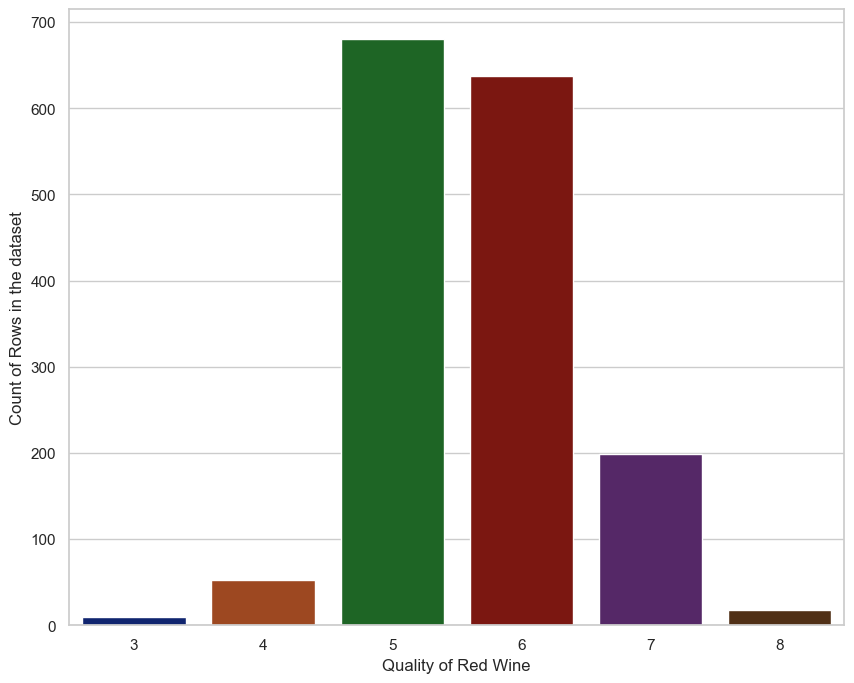

In [30]:
plt.figure(figsize=(10,8))
sb.countplot(x ='quality', data = red_wine)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

# 

## Check for outliers if any and handle them

### Boxplot to check the outliers

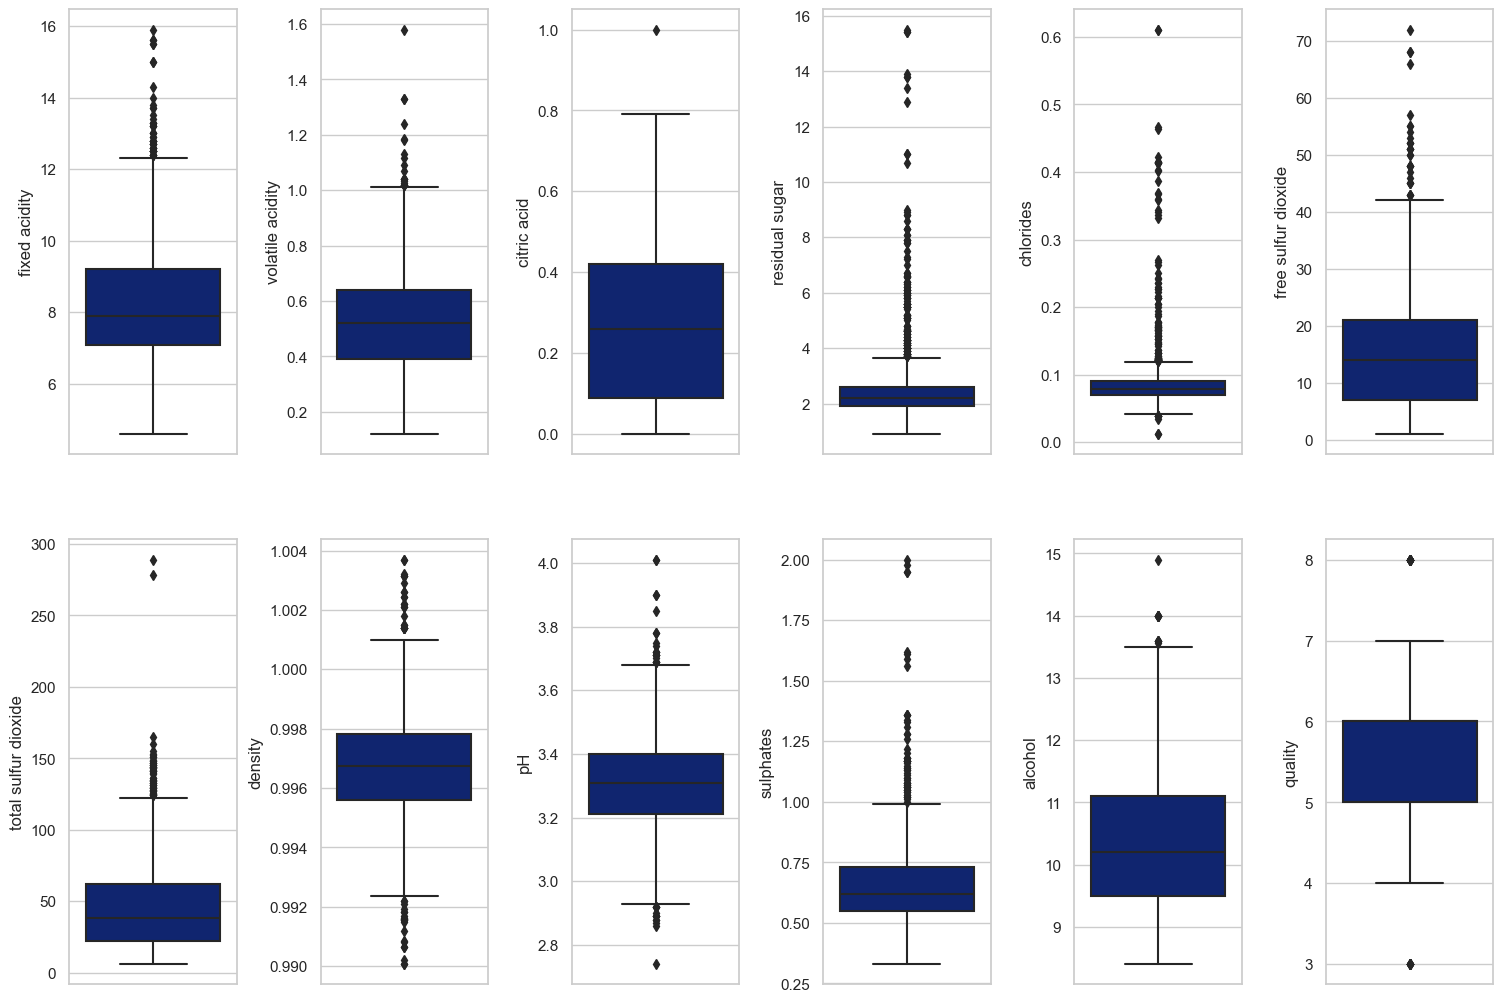

In [31]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in red_wine.items():
    sb.boxplot(y=col, data=red_wine, ax=ax[index])
    
    index += 1
    #sb.histplot(data=red_wine, ax=ax[index], kde=True, palette="dark" )
    
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

### Plots before removing the outliers

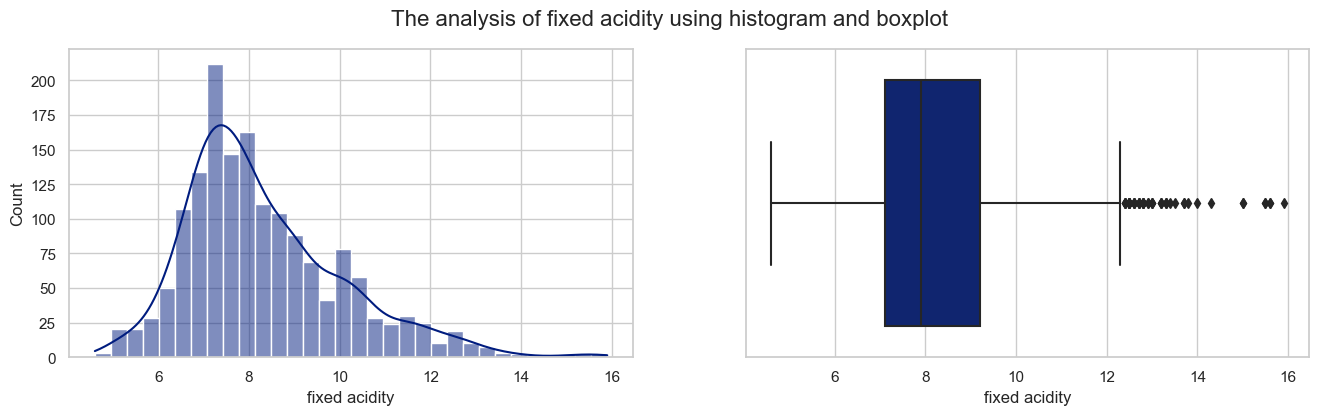

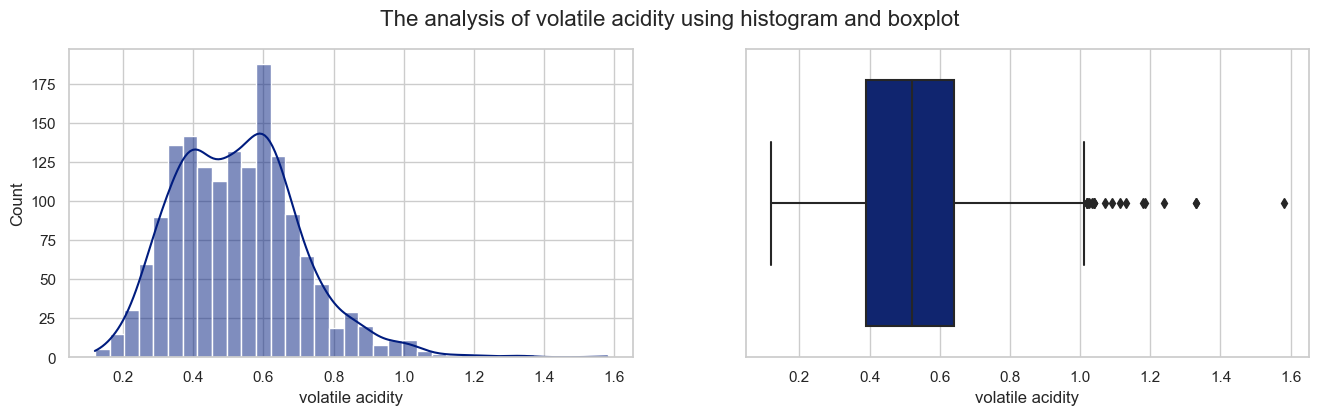

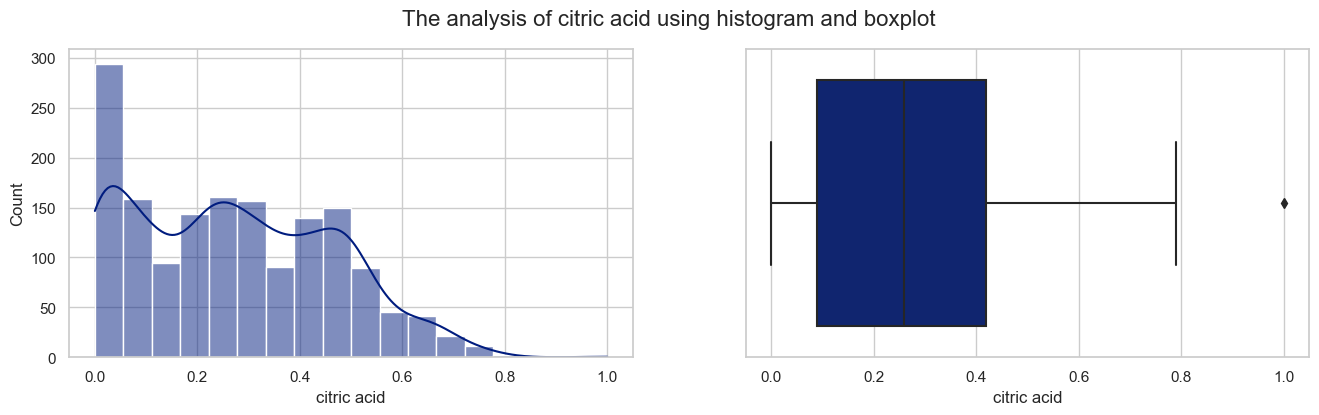

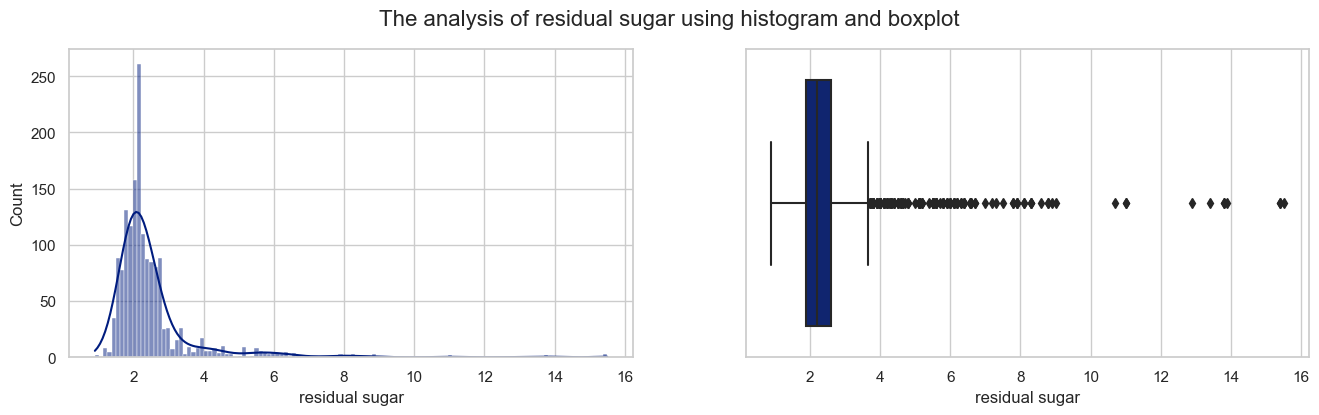

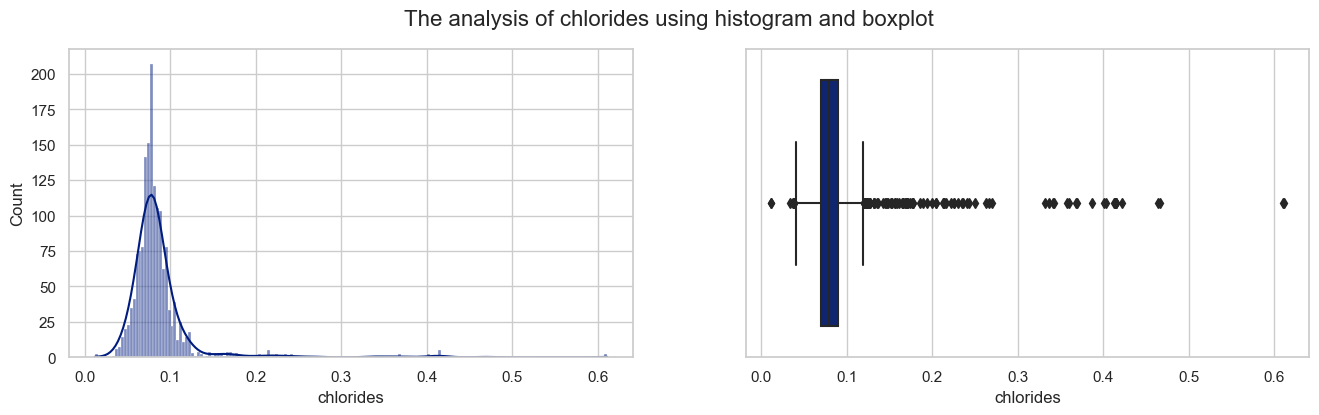

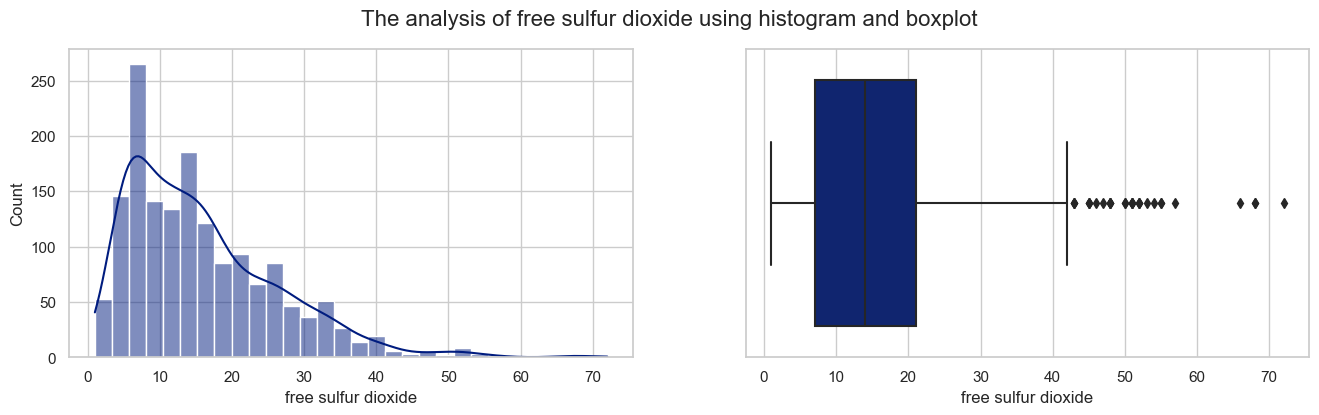

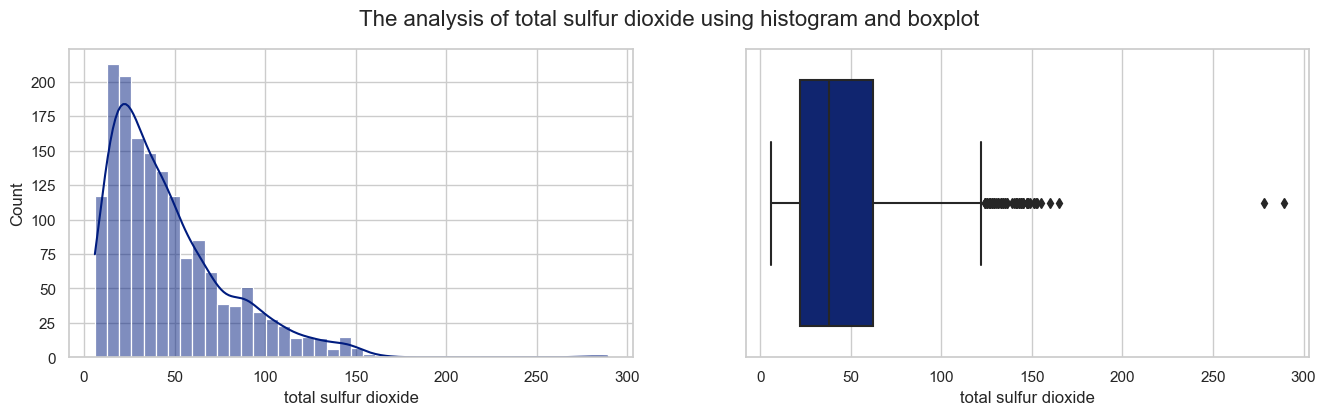

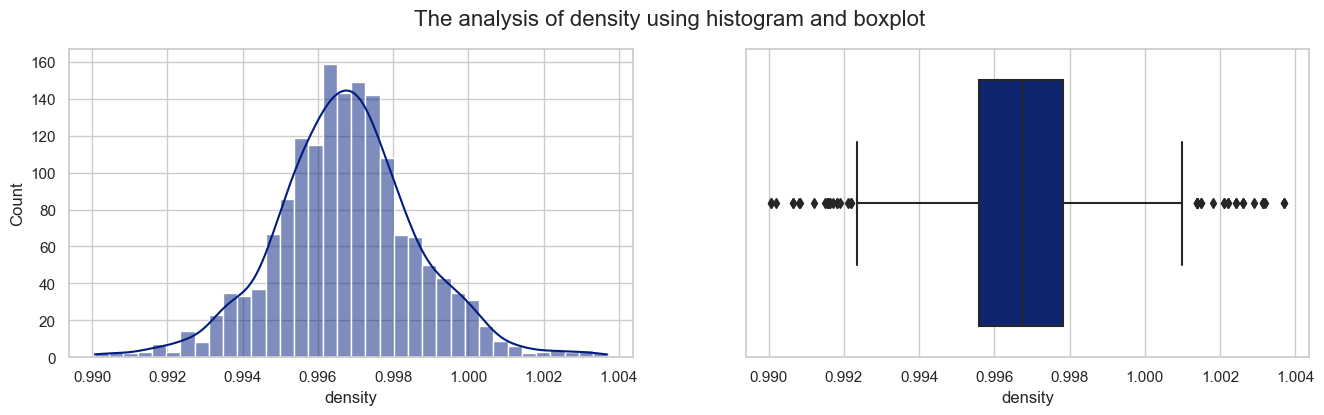

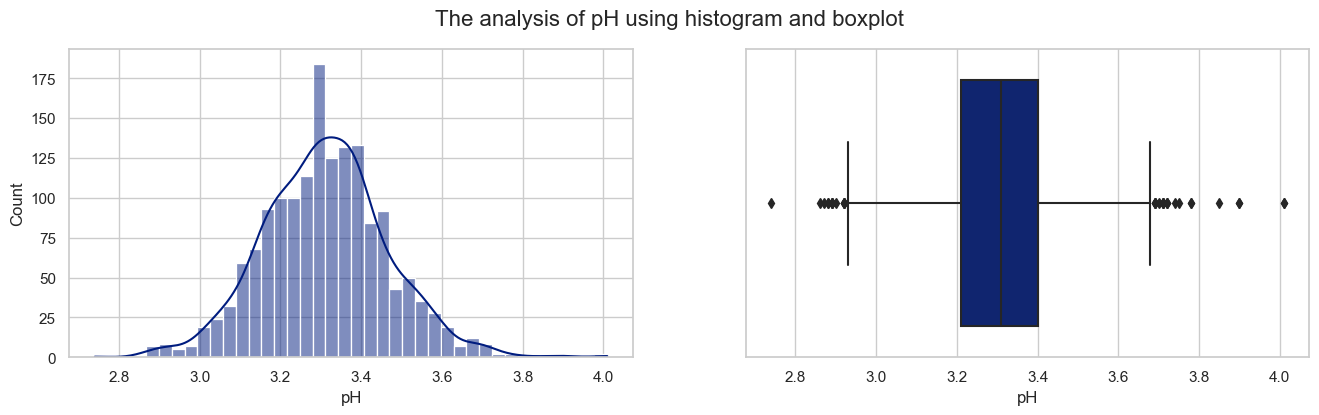

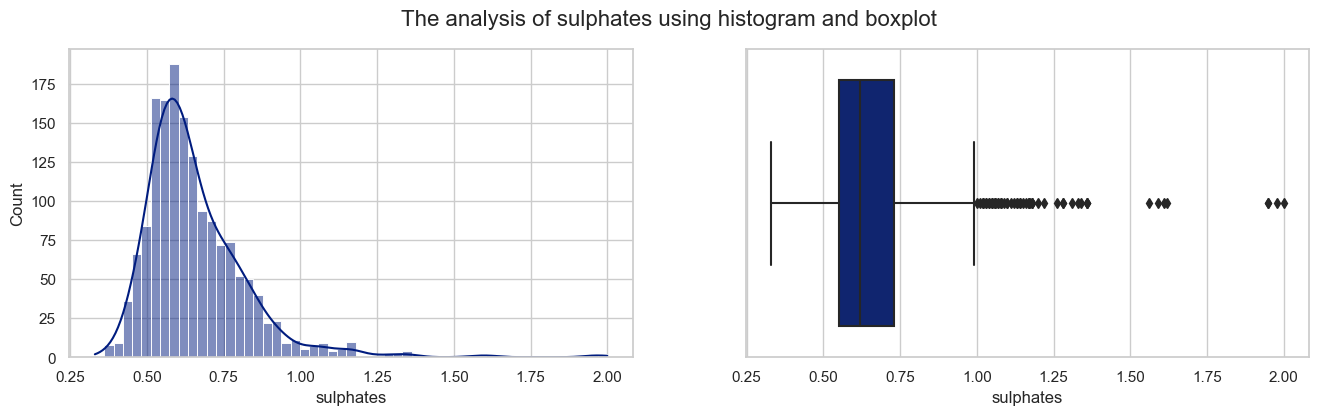

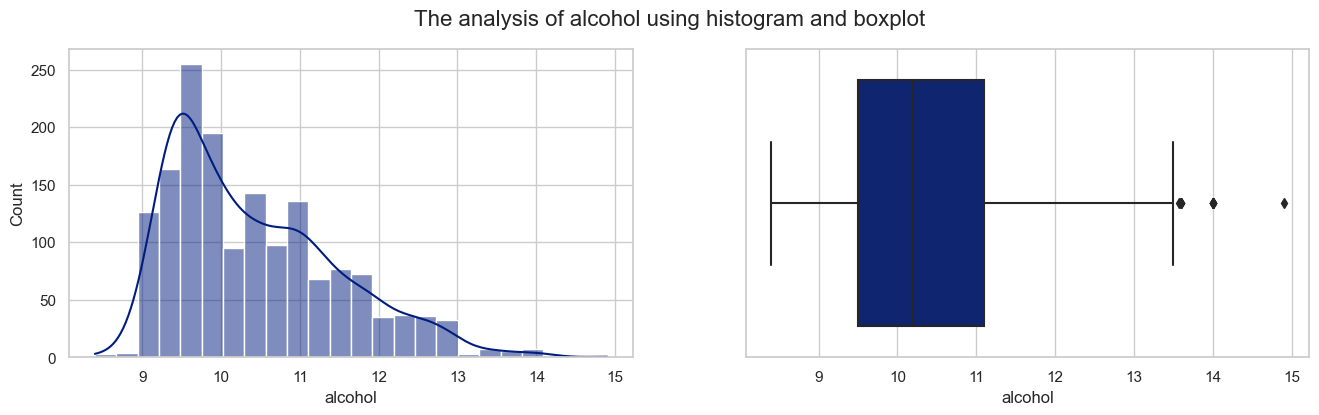

In [32]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for f in columns:
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"The analysis of {f} using histogram and boxplot", fontsize=16)
    plt.subplot(1, 2, 1)
    sb.histplot(data=red_wine, x=f, kde=True, palette="dark" ) 
    plt.subplot(1, 2, 2)
    sb.boxplot(data=red_wine, x=f)

plt.show()   

# 

# Remove the outliers using z_score  and Quantile method.

### Performing the z_score outliers removal method :

In [33]:
z_scores = np.abs(stats.zscore(red_wine))
threshold = 3
outliers = np.where(z_scores > threshold)
#print("Outlier indices:", outliers)

Using Z-scores and a threshold = 3, the code identify extreme outliers in the provided dataset, where the absolute Z-score of a data is greater than 3. 

The outliers can be further investigated to understand if they represent incorrect data points or genuine extreme observations.

In [34]:
# Handle outliers.

# Remove outliers using the z-score method

z_score_data = red_wine[(np.abs(stats.zscore(red_wine)) < threshold).all(axis=1)]

z_score_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
print("Data shape with outliers : ", red_wine.shape)
print("Data shape after removing the outliers using z_score method : ", z_score_data.shape)

Data shape with outliers :  (1599, 12)
Data shape after removing the outliers using z_score method :  (1451, 12)


In [36]:
data_loss_for_z_score=(1599-1451)/1599*100 
# 1599 (number of rows in the original dataframe) and 1451 (number of rows after outlier removal)
data_loss_for_z_score

9.255784865540964

In [37]:
z_score_skewness = z_score_data.skew()
print("Skewness details for red wine dataset after removing the outliers using z_score : ", '\n')
print(z_score_skewness)

Skewness details for red wine dataset after removing the outliers using z_score :  

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64


Still we don't have a cleaned proper data still this columns (total sulfur dioxide, residual sugar, chlorides) skewness value is greater than 1.

### Performing the Quantile outliers removal method :

In [38]:
Q1 = red_wine[columns].quantile(0.25)
Q3 = red_wine[columns].quantile(0.75)
IQR = Q3 - Q1

quantile_data = red_wine[~((red_wine[columns] < (Q1 - 1.5 * IQR)) |(red_wine[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
quantile_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
print("Data shape with outliers : ", red_wine.shape)
print("Data shape after removing the outliers using quantile method : ", quantile_data.shape)

Data shape with outliers :  (1599, 12)
Data shape after removing the outliers using quantile method :  (1194, 12)


In [40]:
data_loss_for_quantile=(1599-1179)/1599*100 
# 1599 (number of rows in the original dataframe) and 1179 (number of rows after outlier removal)
data_loss_for_quantile

26.26641651031895

In [41]:
quantile_skewness = quantile_data.skew()
print("Skewness details for red wine dataset after removing the outliers using Quantile method : ", '\n')
print(quantile_skewness)

Skewness details for red wine dataset after removing the outliers using Quantile method :  

fixed acidity           0.731072
volatile acidity        0.285773
citric acid             0.305563
residual sugar          0.619622
chlorides               0.225858
free sulfur dioxide     0.844992
total sulfur dioxide    0.981893
density                 0.047443
pH                      0.060418
sulphates               0.615406
alcohol                 0.775389
quality                 0.342786
dtype: float64


After using the quantile method we can see that the skewness of all columns is between -1 to 1. So we can use these data for further analysis.

# 

# Implement Correlation heatmap.

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

## Correlation heatmap for main "red_wine" dataset.

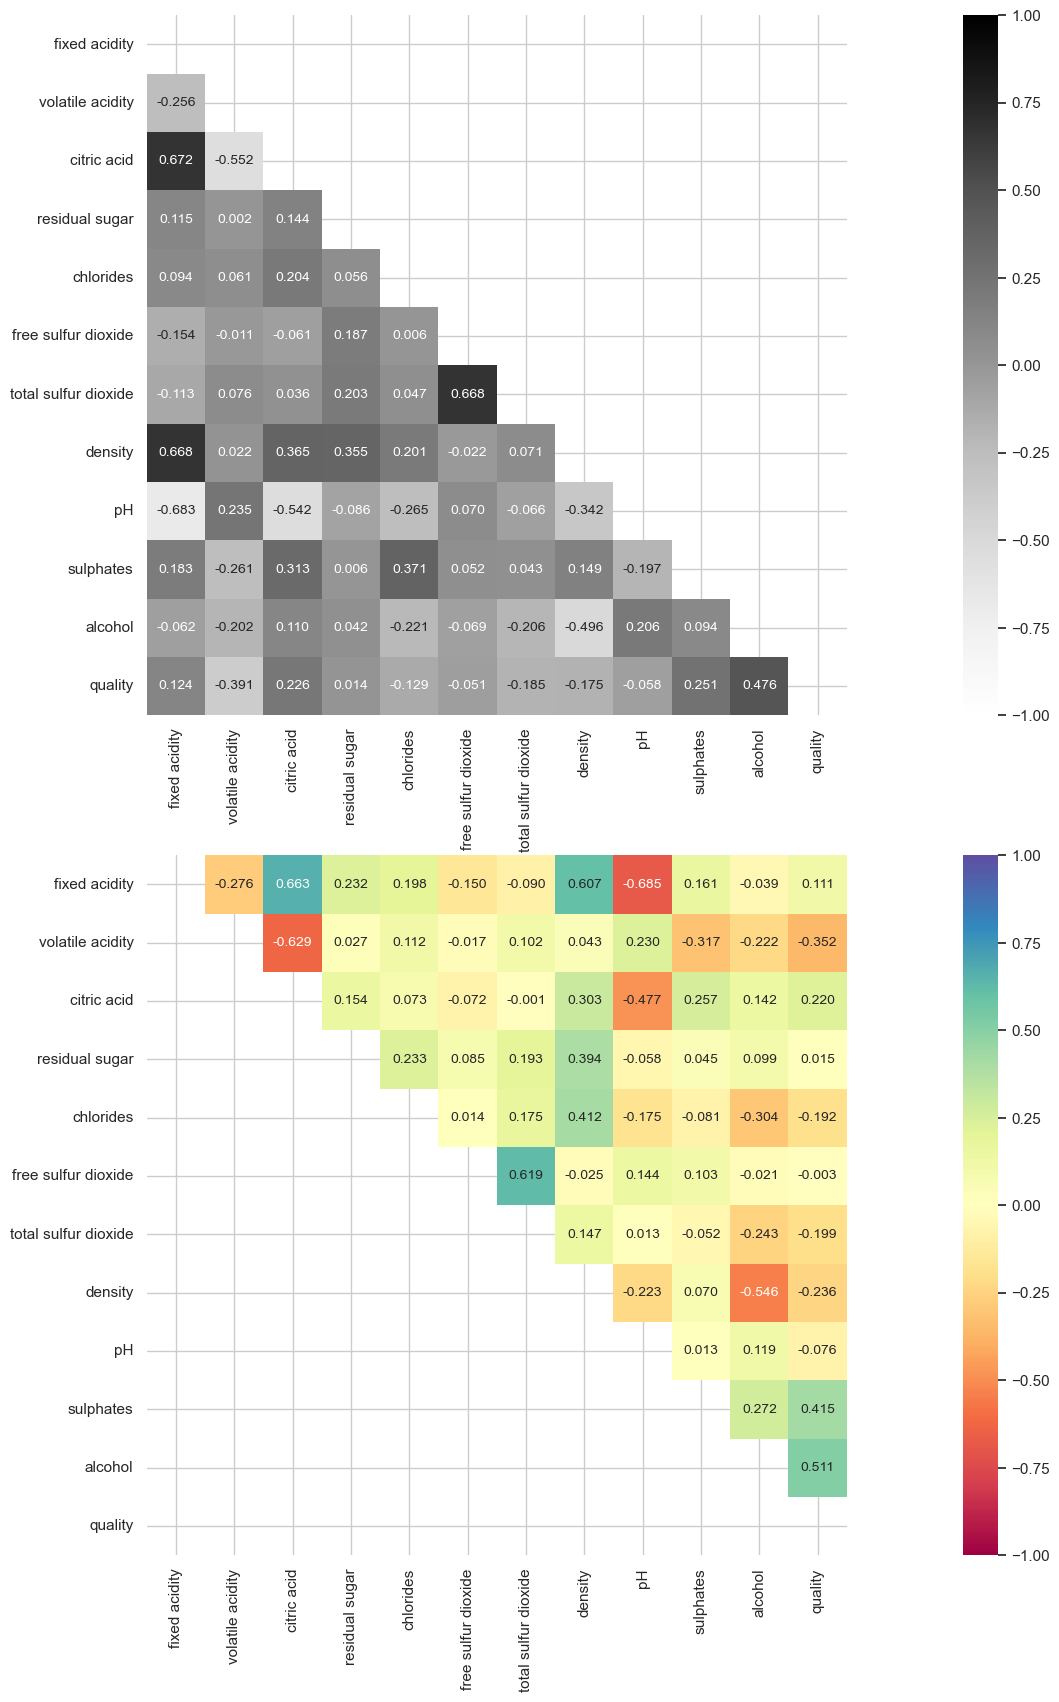

In [42]:
left_traingle = np.triu(red_wine.corr())
right_triangle = np.tril(quantile_data.corr())

plt.figure(figsize=(30, 20))

plt.subplot(2, 1, 1)
sb.heatmap(red_wine.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Greys", mask=left_traingle)

plt.subplot(2, 1, 2)
sb.heatmap(quantile_data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=right_triangle)


plt.show()

Above we have displayed correlation heatmap for both data sets actual one and for data after removing the outliers using Quantile method, 

where the left_traingle = actual dataset and right_traingle = for data after performing the Quantile method.

To get the correlation details for both datasets we have.

# 

# Check the distribution of data using histograms

### Histogram comaparasions for dataset before and after performing outliers removal method:

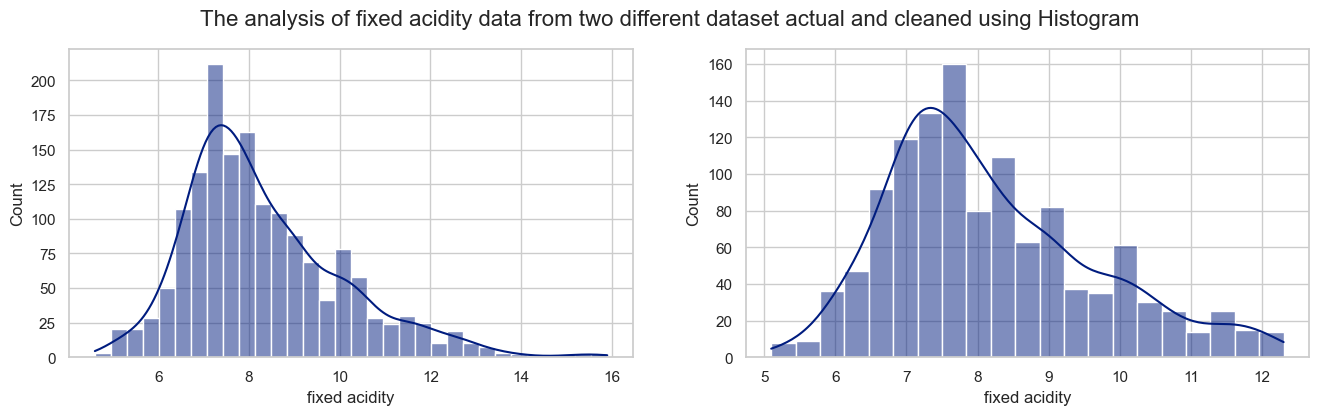

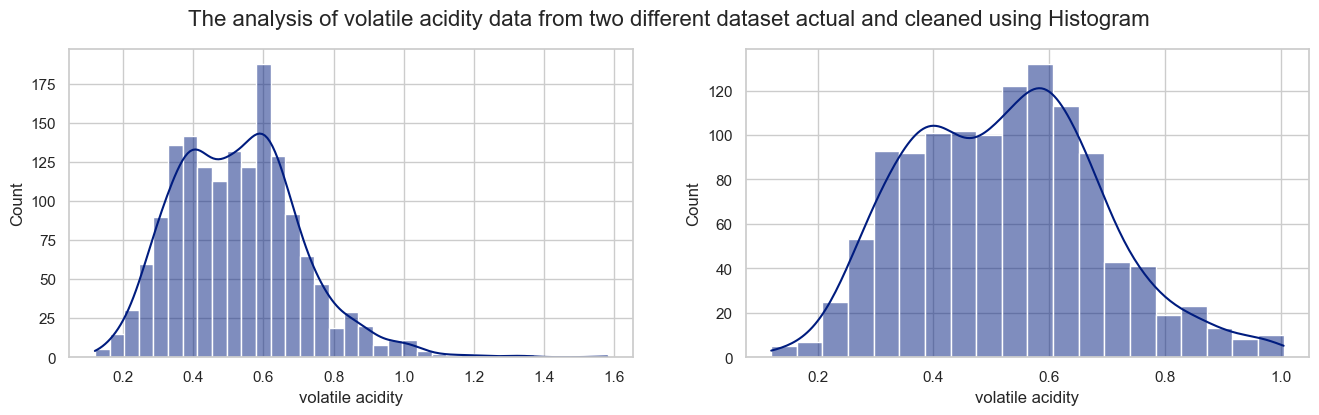

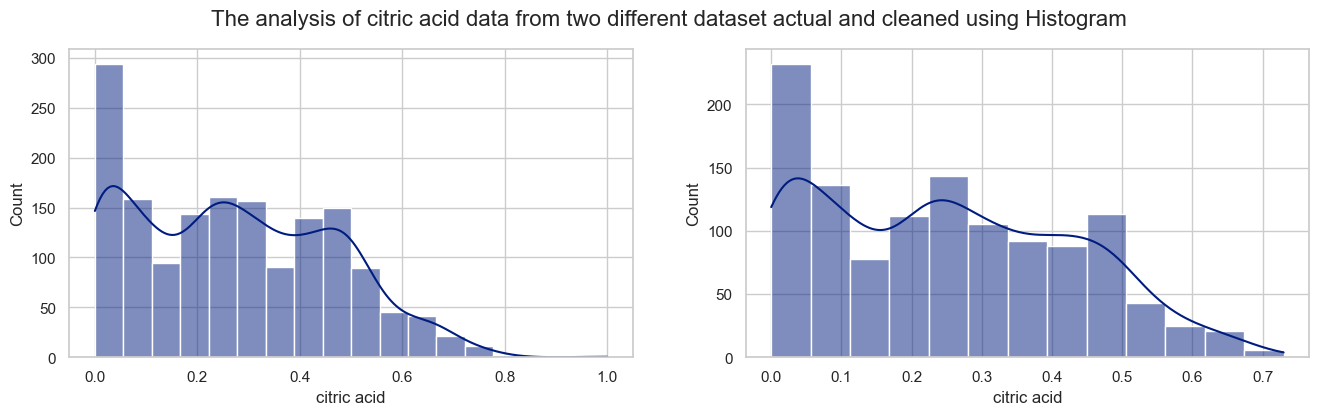

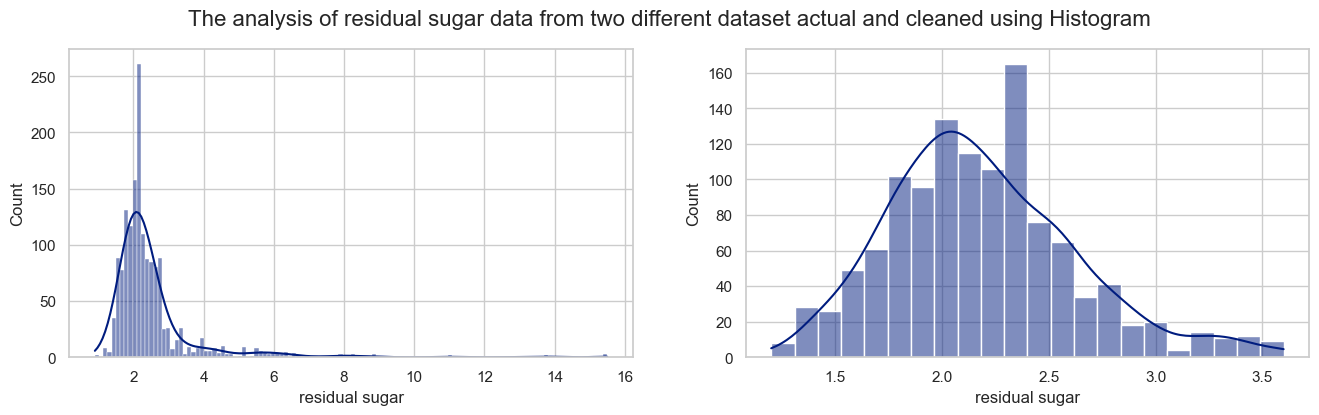

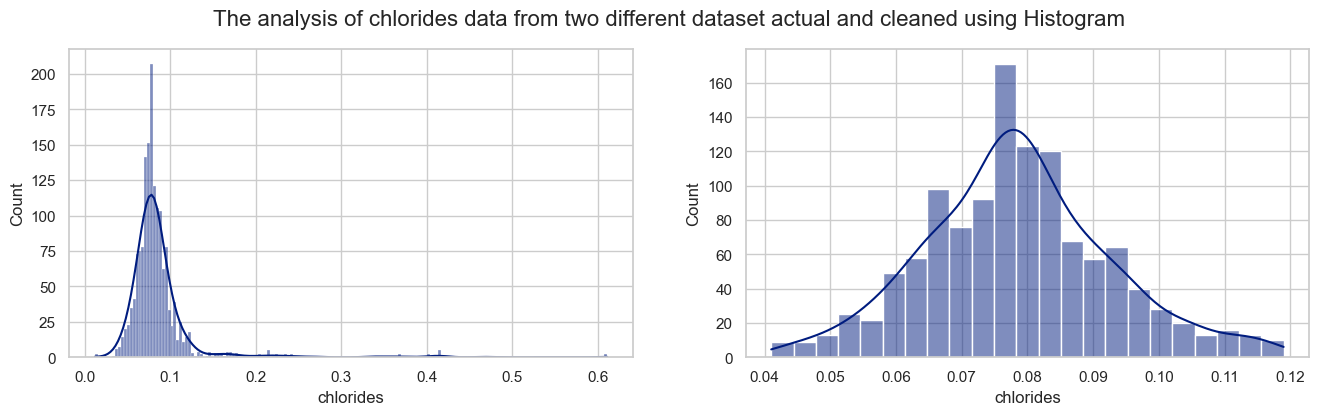

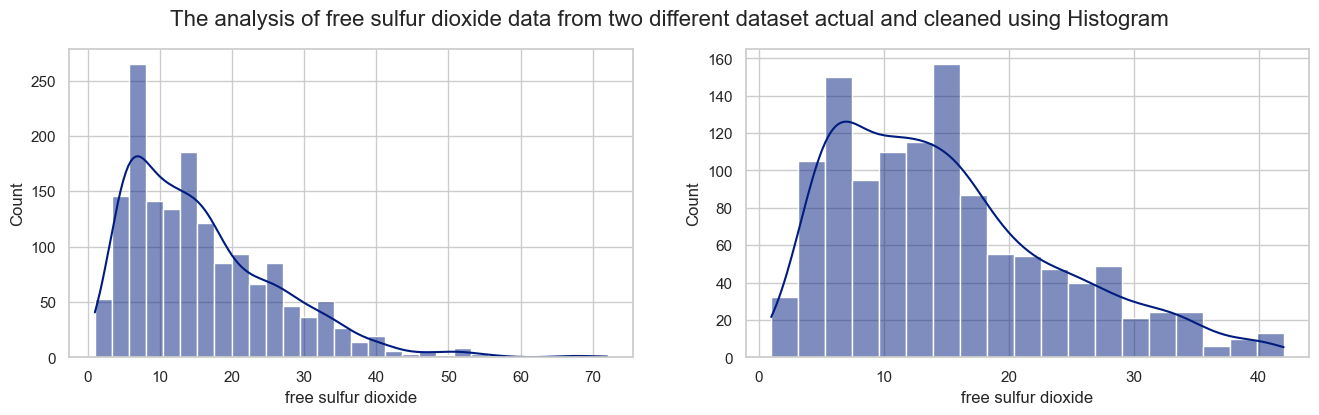

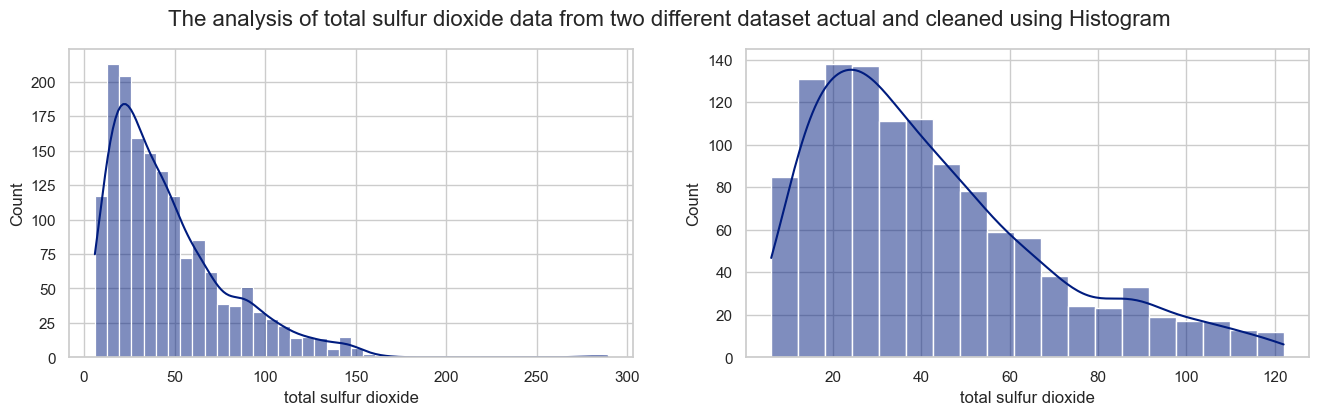

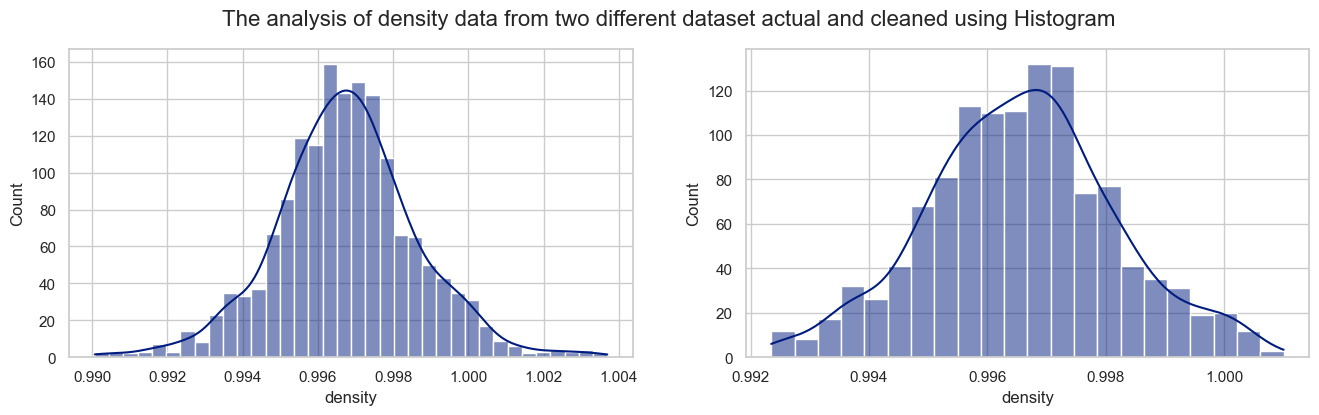

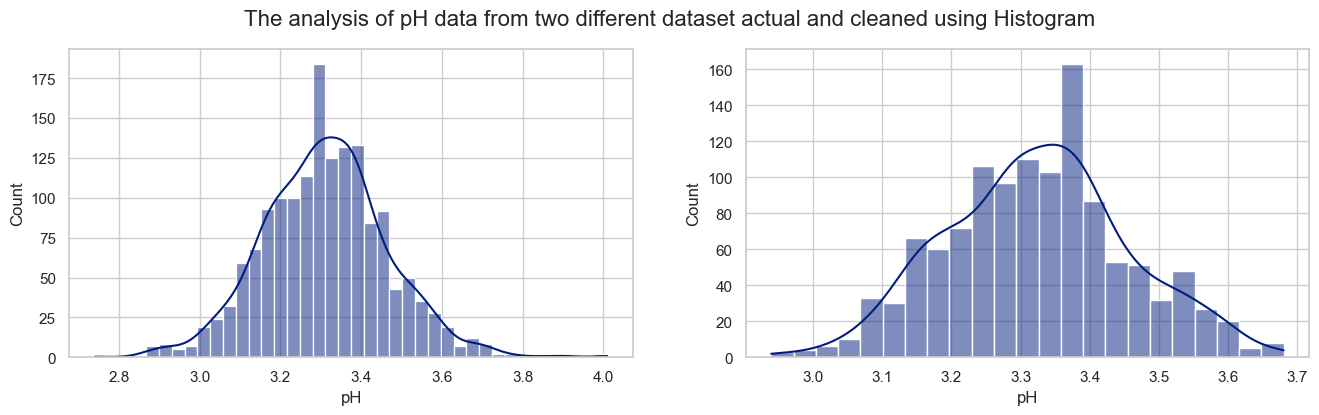

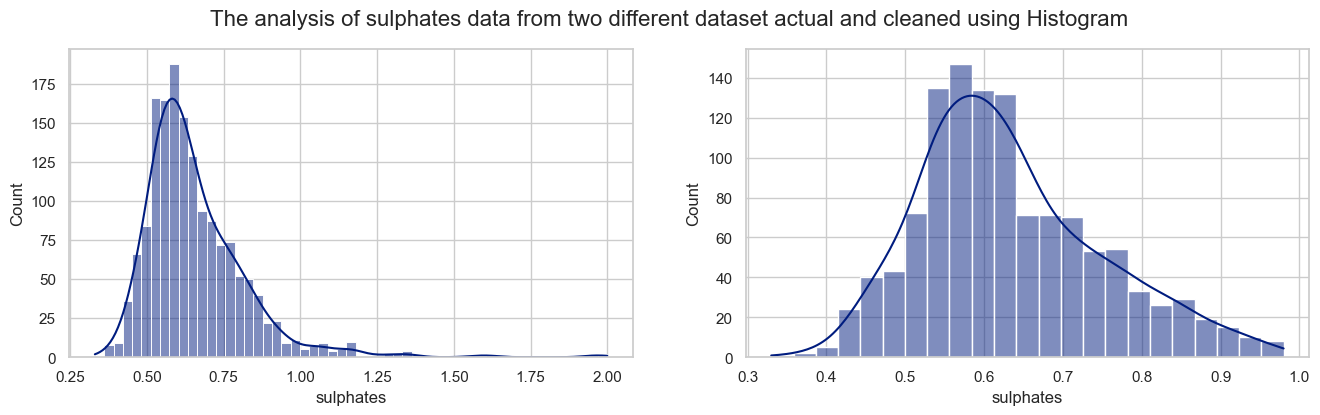

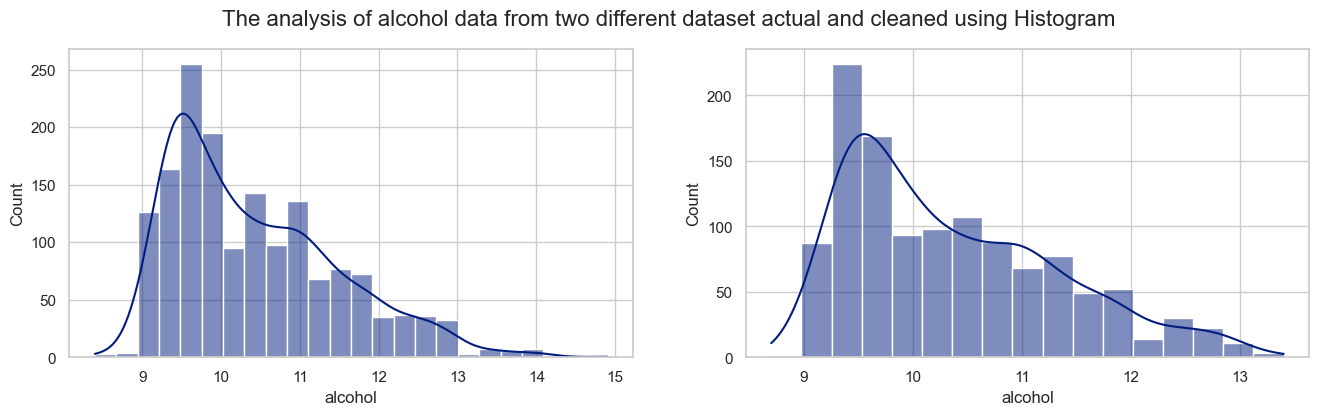

In [43]:
for k in columns:
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"The analysis of {k} data from two different dataset actual and cleaned using Histogram", fontsize=16)
    plt.subplot(1, 2, 1)
    sb.histplot(data=red_wine, x=k, kde=True, palette="dark") 
    plt.subplot(1, 2, 2)
    sb.histplot(data=quantile_data, x=k, kde=True, palette="light")

plt.show() 


###  Boxplot comaparasions for dataset before and after performing outliers removal method:

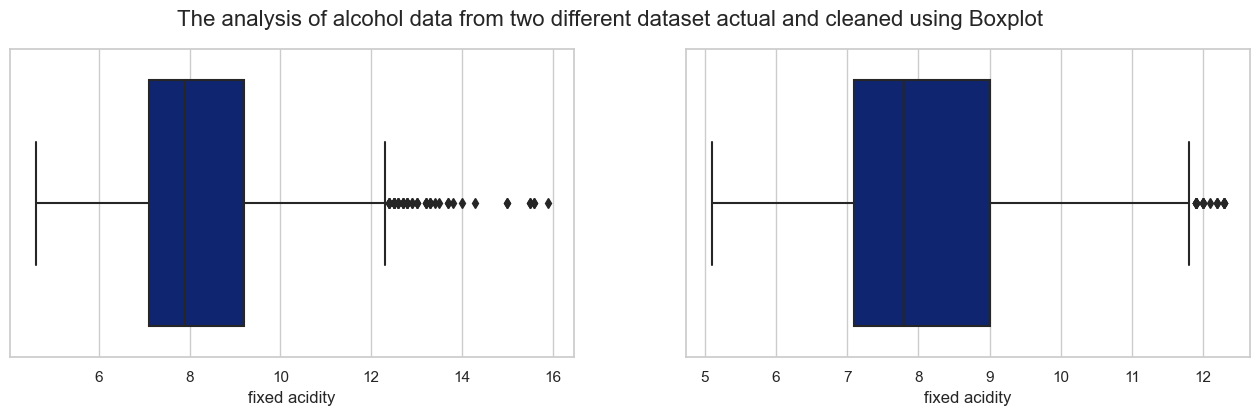

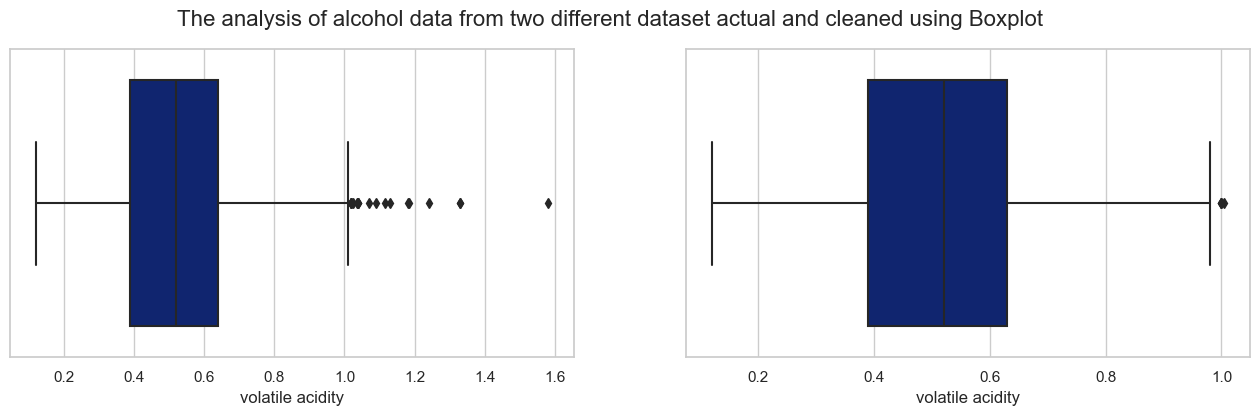

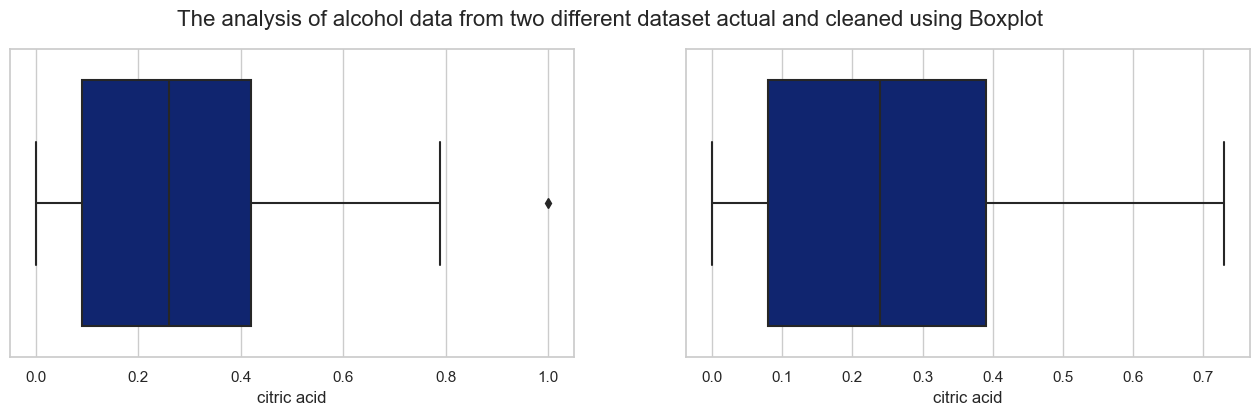

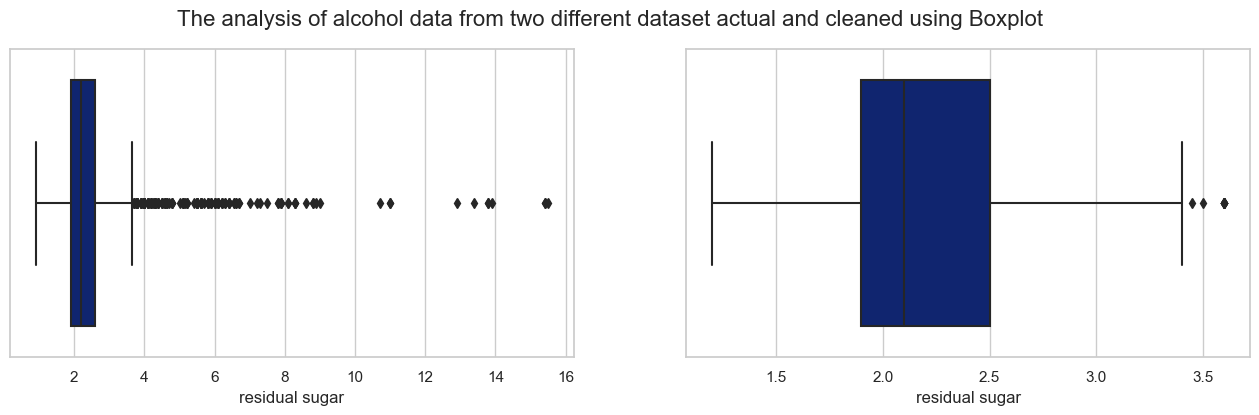

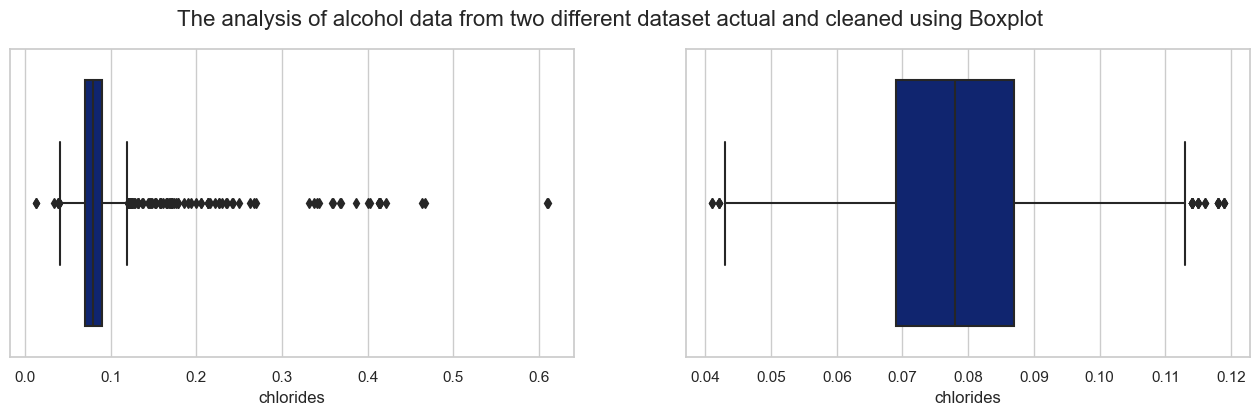

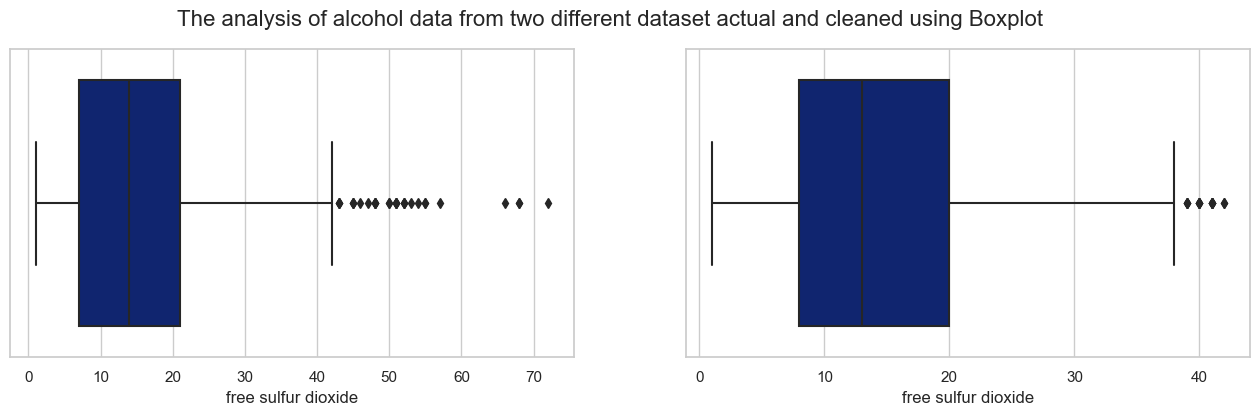

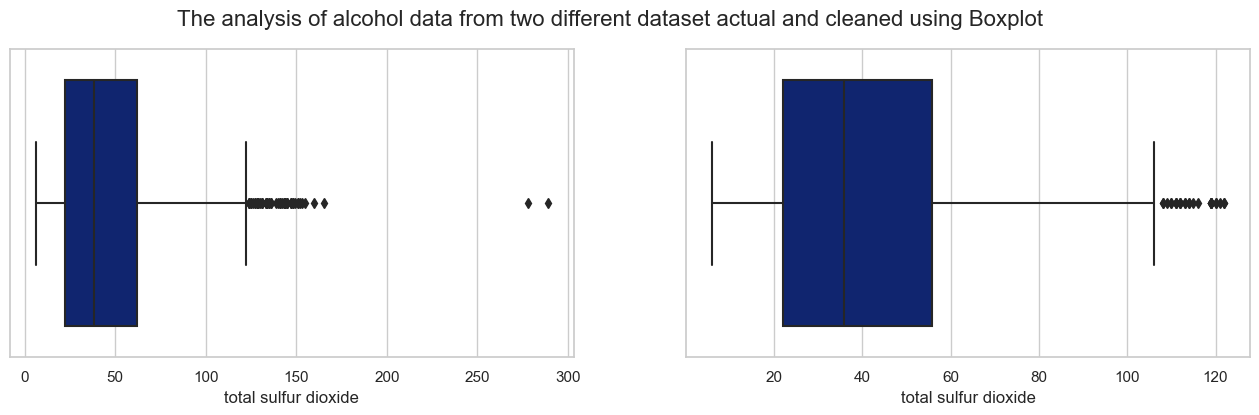

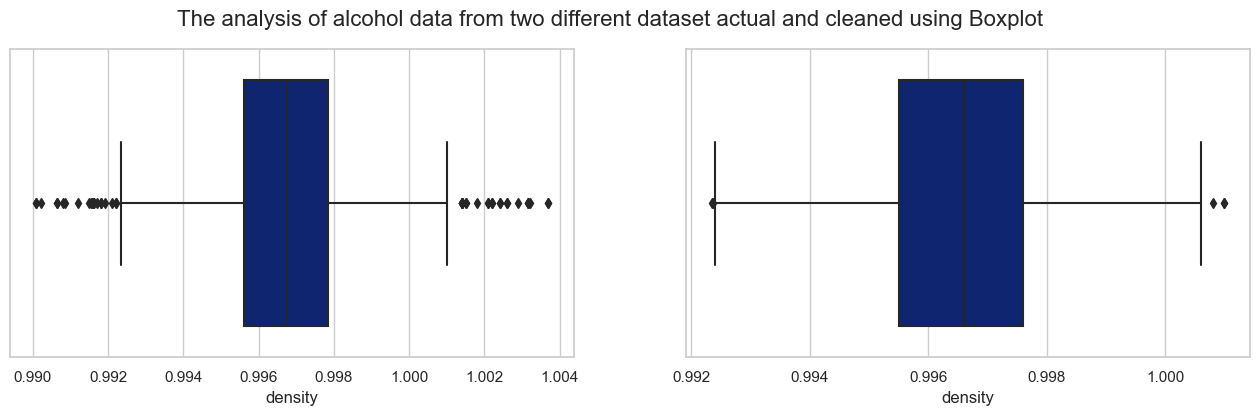

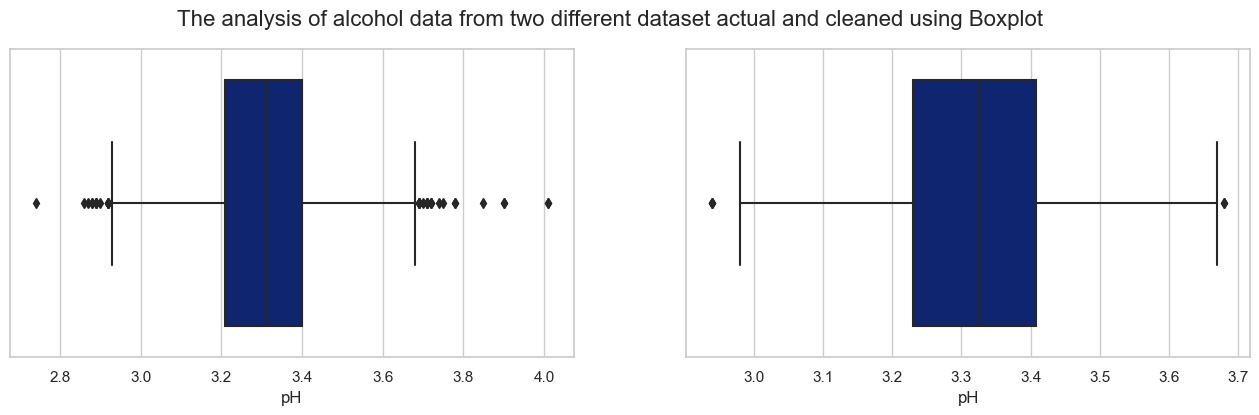

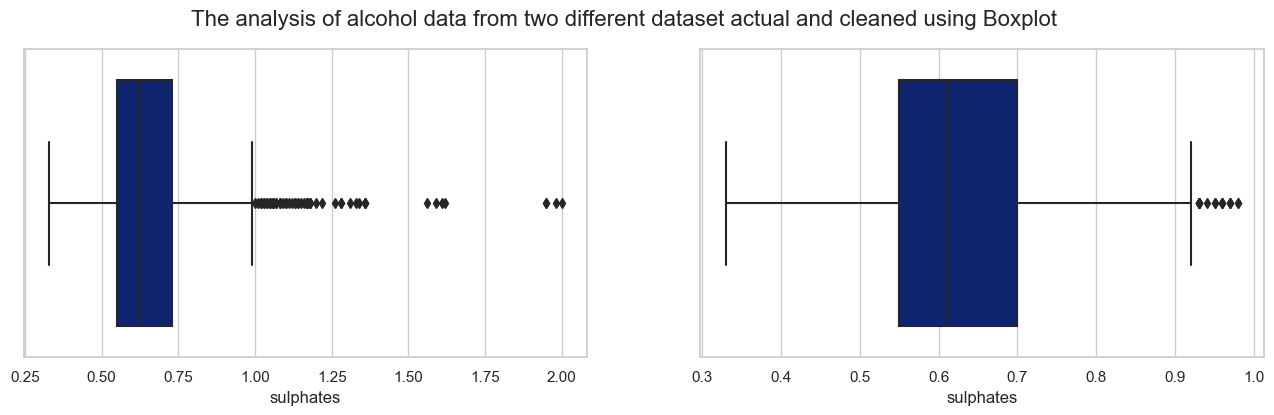

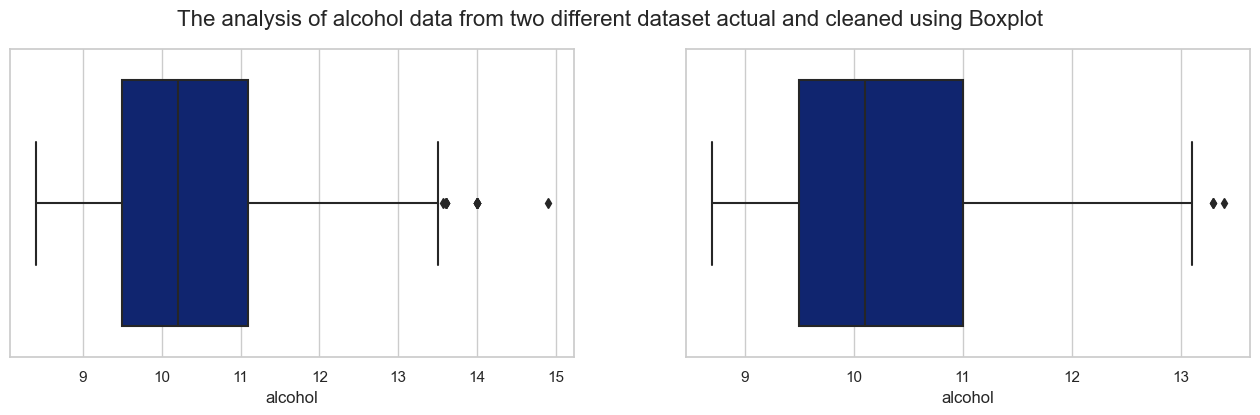

In [27]:
for q in columns:
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"The analysis of {f} data from two different dataset actual and cleaned using Boxplot", fontsize=16)
    plt.subplot(1, 2, 1)
    sb.boxplot(data=red_wine, x=q)
    plt.subplot(1, 2, 2)
    sb.boxplot(data=quantile_data, x=q)

plt.show() 

Decrease in the number of outliers after performing quantile method which can be clearly observerd from above boxplot comparison between both dataset.

### Catplot for finding the relations between feature columns and target variable column.

<Figure size 640x480 with 0 Axes>

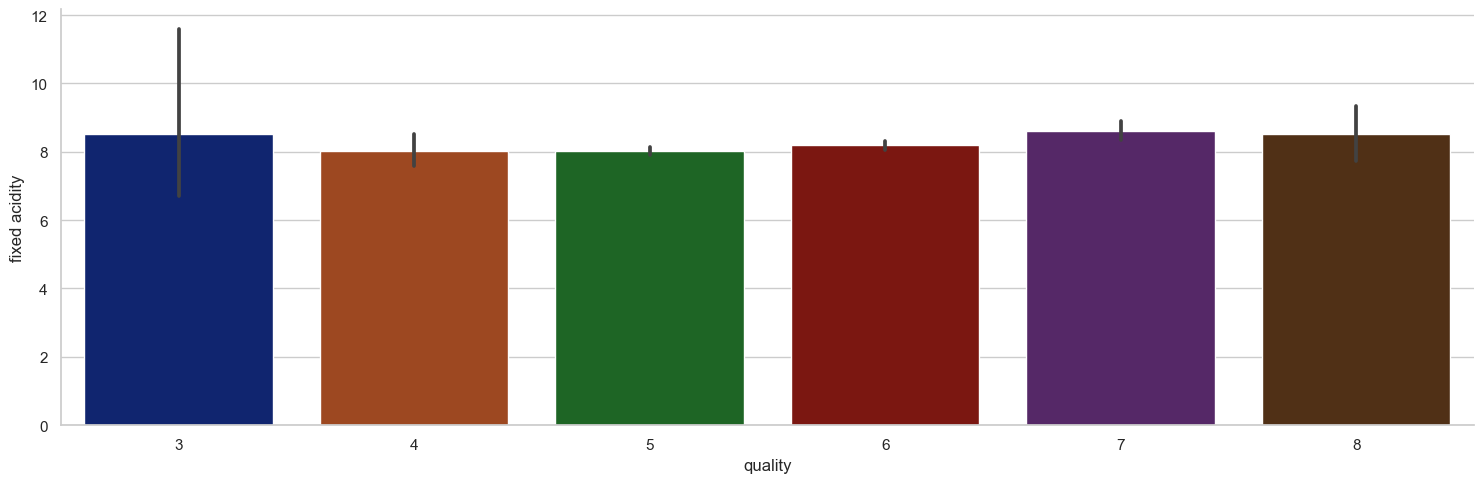

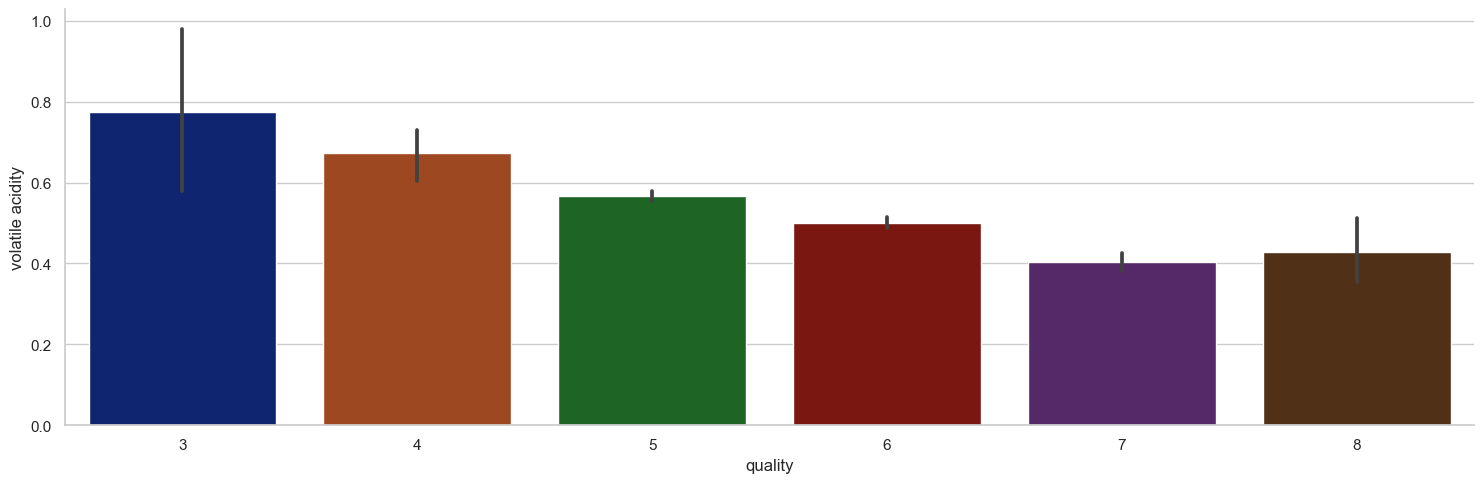

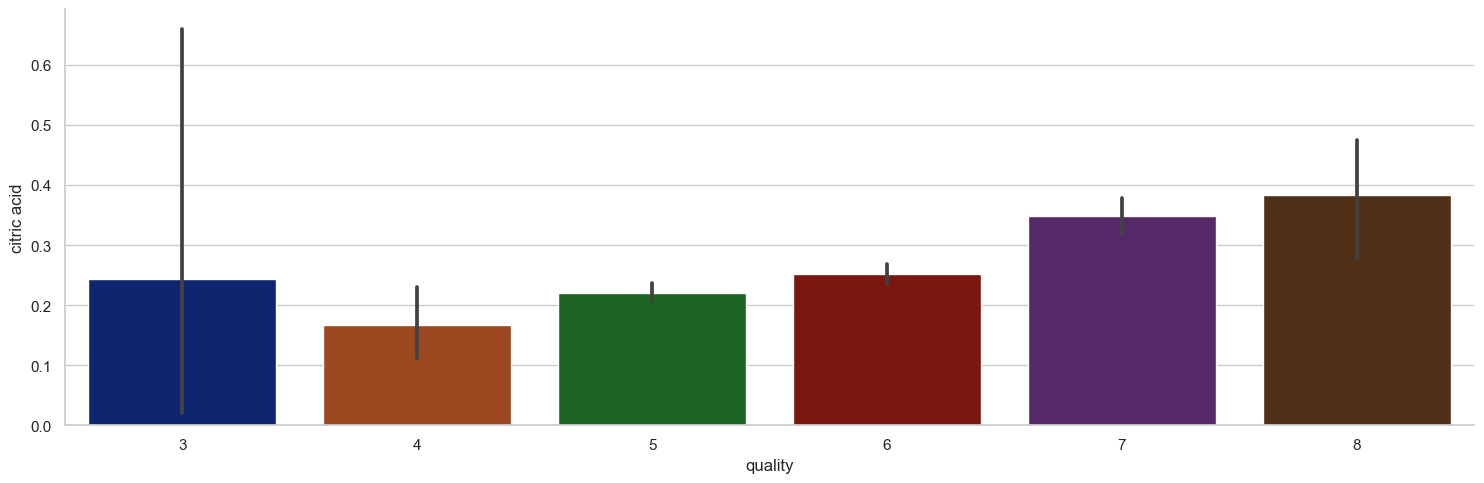

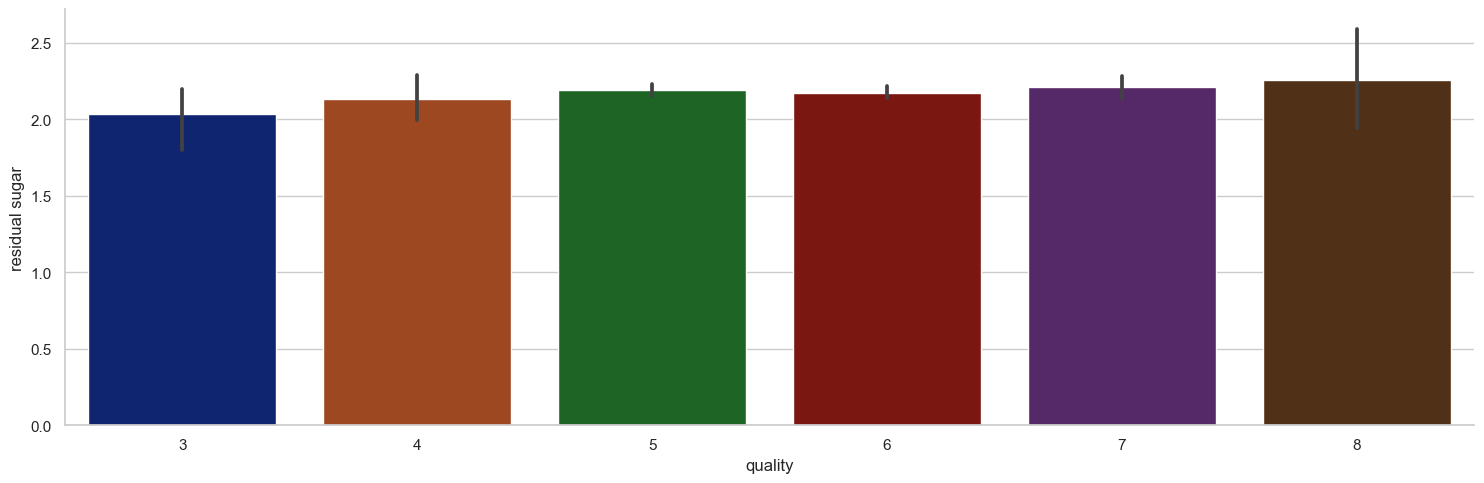

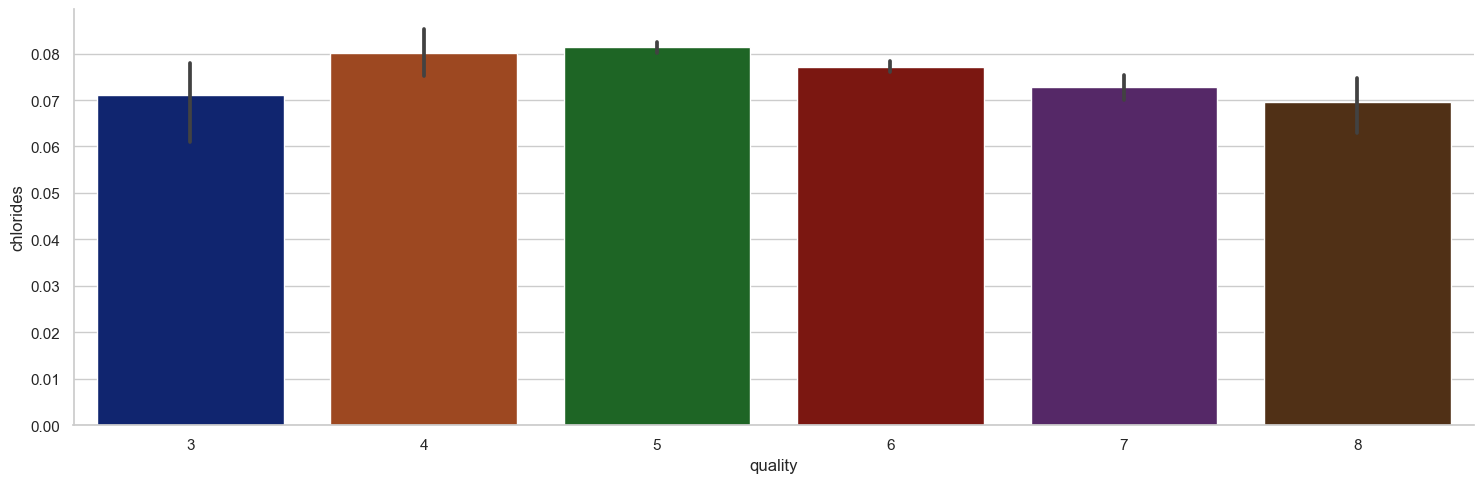

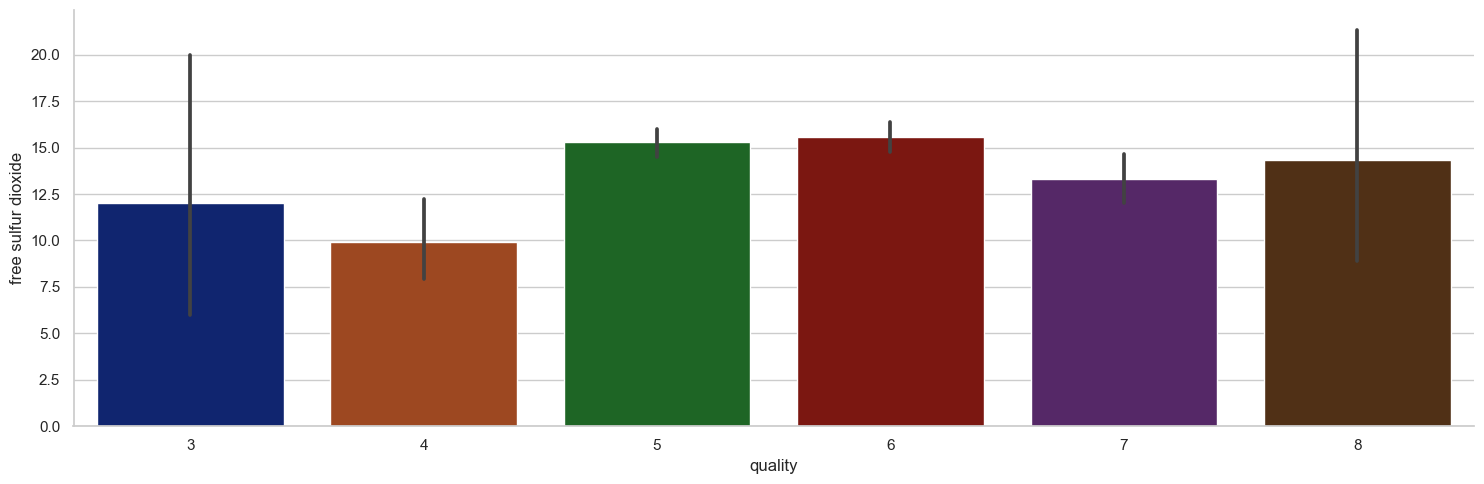

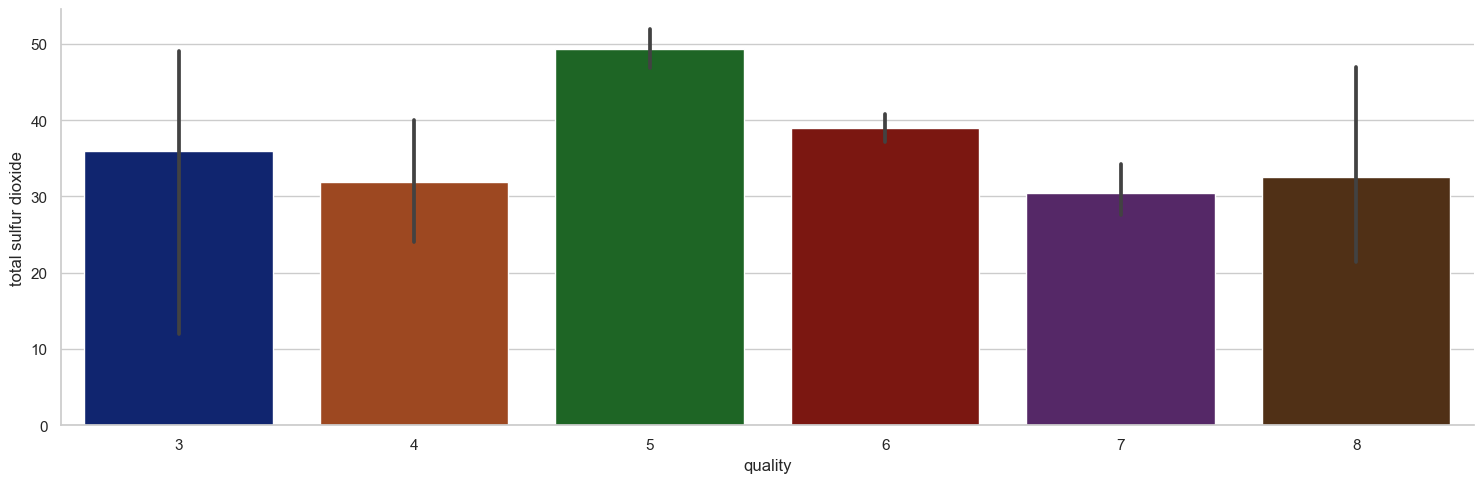

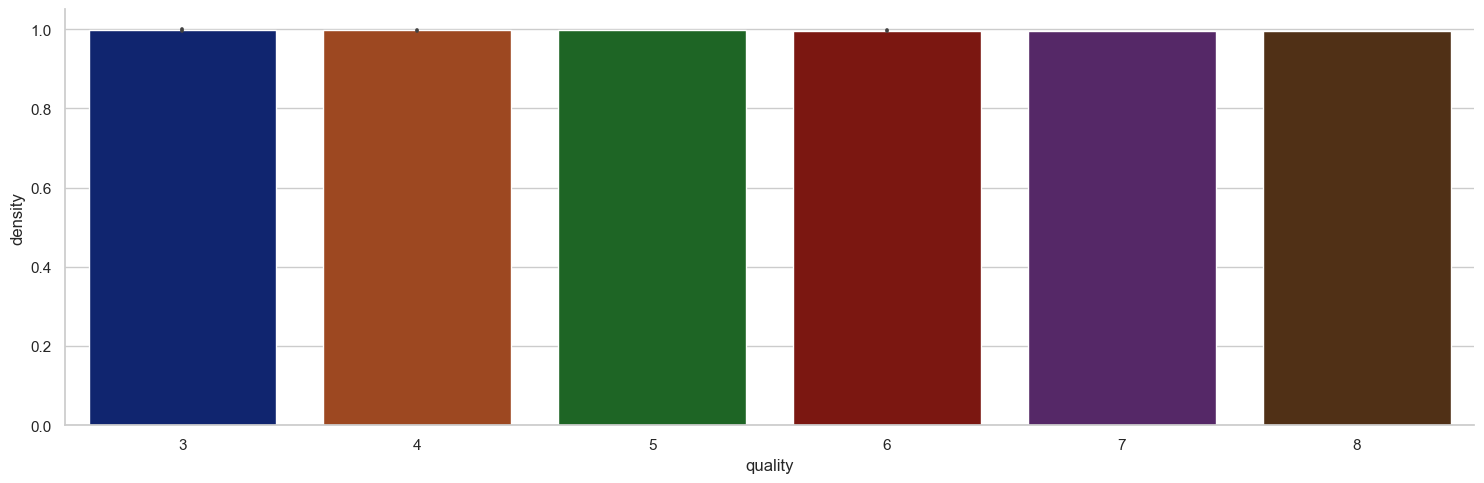

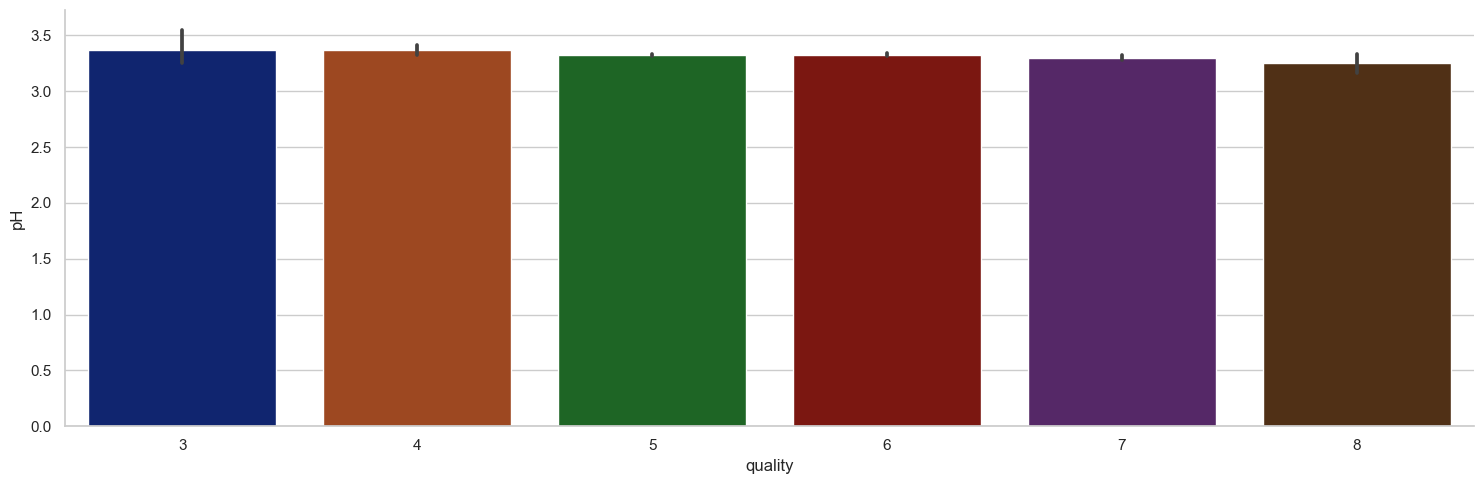

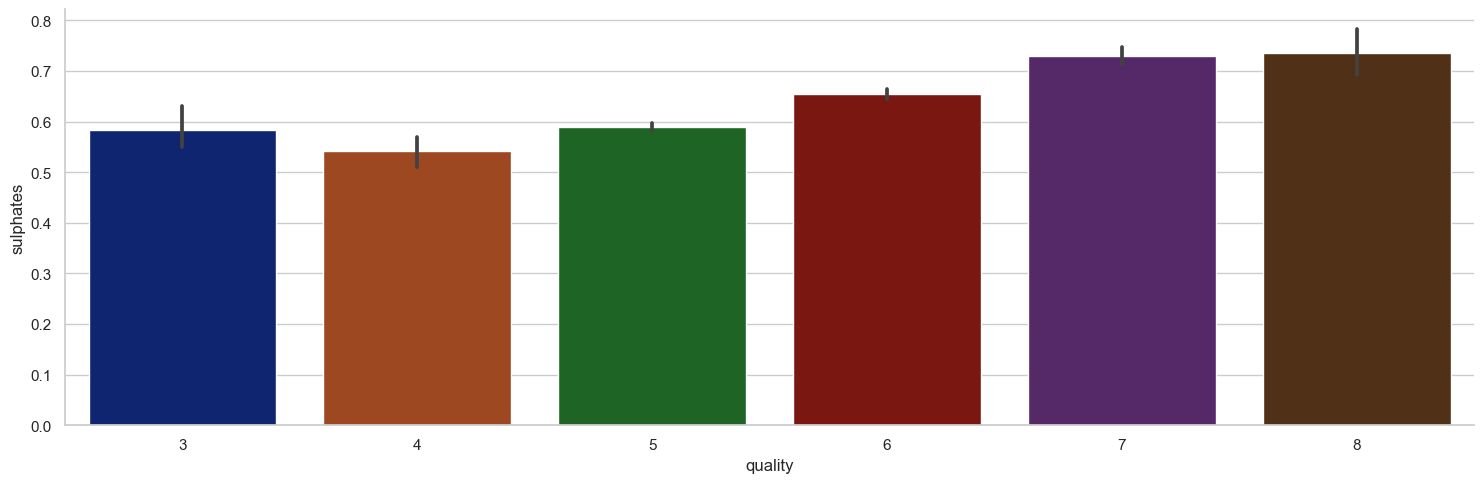

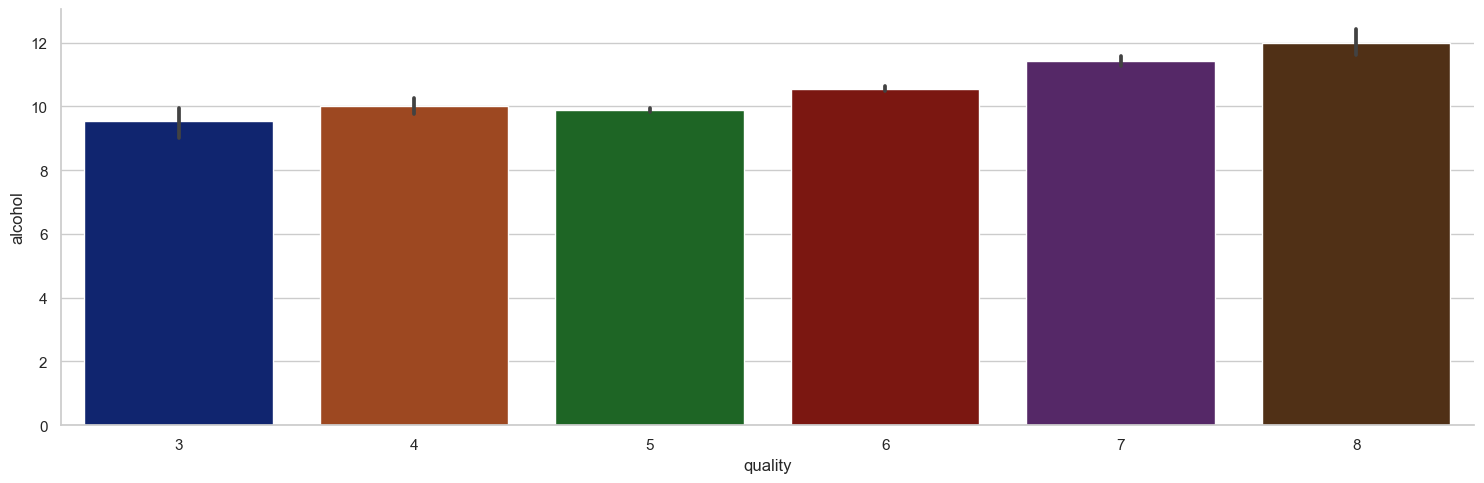

In [28]:
for i, col in enumerate(columns):
    plt.figure(i)
    sb.catplot(x = 'quality', y=col, data=quantile_data, kind = "bar", aspect =3)

From above plot these can be concluded that to get better quality for red wine citric acid, sulphates and alcohol columns play a major role.

# 

# Prepare the data for modeling

## Storing features and traget variable in variables

In [31]:
X = quantile_data.drop(['quality'], axis=1)  
Y_quality = quantile_data['quality']

X = pd.get_dummies(X)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# 

# Features Scaling using Standard and Robust.

### Standard Scaler : 

In [35]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("\nScaled DataFrame using StandardScaler:")
X_scaled


Scaled DataFrame using StandardScaler:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805
1,-0.250994,2.167738,-1.377452,0.937243,1.365747,1.133715,0.952872,0.142508,-0.938945,0.411596,-0.579638
2,-0.250994,1.439628,-1.155393,0.258471,0.946004,-0.000665,0.454289,0.267217,-0.484660,0.153303,-0.579638
3,2.076938,-1.472812,1.731370,-0.646558,-0.243268,0.226211,0.684404,0.890766,-1.241802,-0.449381,-0.579638
4,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805
...,...,...,...,...,...,...,...,...,...,...,...
1189,-1.346492,0.468815,-0.933335,-0.420300,0.806089,1.927782,0.070763,-1.042235,0.953911,-0.449381,0.138154
1190,-1.551897,0.165436,-0.822305,0.032214,-1.152711,2.721848,0.339231,-0.905054,1.483910,1.100377,0.855945
1191,-1.278023,-0.077268,-0.655761,0.258471,-0.173311,1.587467,-0.082648,-0.518454,0.726768,1.014280,0.650862
1192,-1.551897,0.741856,-0.711276,-0.420300,-0.243268,1.927782,0.070763,-0.686812,1.862481,0.669889,-0.169471


### Robust Scaler :

In [36]:
robust_scaler = RobustScaler()

X_robust_scaled_data = pd.DataFrame(robust_scaler.fit_transform(X), columns=X.columns)

print("\nScaled DataFrame using RobustScaler:")
X_robust_scaled_data


Scaled DataFrame using RobustScaler:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.210526,0.750000,-0.774194,-0.333333,-0.111111,-0.166667,-0.059259,0.573477,1.042254,-0.333333,-0.466667
1,0.000000,1.500000,-0.774194,0.833333,1.111111,1.000000,0.918519,0.095579,-0.704225,0.466667,-0.200000
2,0.000000,1.000000,-0.645161,0.333333,0.777778,0.166667,0.533333,0.191159,-0.366197,0.266667,-0.200000
3,1.789474,-1.000000,1.032258,-0.333333,-0.166667,0.333333,0.711111,0.669056,-0.929577,-0.200000,-0.200000
4,-0.210526,0.750000,-0.774194,-0.333333,-0.111111,-0.166667,-0.059259,0.573477,1.042254,-0.333333,-0.466667
...,...,...,...,...,...,...,...,...,...,...,...
1189,-0.842105,0.333333,-0.516129,-0.166667,0.666667,1.583333,0.237037,-0.812425,0.704225,-0.200000,0.266667
1190,-1.000000,0.125000,-0.451613,0.166667,-0.888889,2.166667,0.444444,-0.707288,1.098592,1.000000,0.733333
1191,-0.789474,-0.041667,-0.354839,0.333333,-0.111111,1.333333,0.118519,-0.410992,0.535211,0.933333,0.600000
1192,-1.000000,0.520833,-0.387097,-0.166667,-0.166667,1.583333,0.237037,-0.540024,1.380282,0.666667,0.066667


#### Here we will use the robust scaled data for modeling.

In [37]:
Y_quality.value_counts()

quality
5    513
6    498
7    135
4     33
8     12
3      3
Name: count, dtype: int64

# 

# Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

## Simple modelling approach :

## Splitting dataset to 80-40 ratio.

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_robust_scaled_data, Y_quality, test_size=0.2, random_state=232)


print(len(Y_good), '\n')

print("Training set:")
print("X_train shape:", X_train.shape)
print("y_train shape:", Y_train.shape)


print("\nTesting set:")
print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)


1194 

Training set:
X_train shape: (955, 11)
y_train shape: (955,)

Testing set:
X_test shape: (239, 11)
y_test shape: (239,)


## Training models using training dataset and predicting using test dataset:

In [160]:
def model_evaluation(Final_model,X_train, Y_train, X_test, Y_test):
    print("Model evaluation on test data set", "\n")
    
    for algo_name, algo in Final_model:
        
        Final_model = algo()

        start_time = time.time()   
        Final_model.fit(X_train, Y_train)
        latency = time.time() - start_time    
        
        prediction = Final_model.predict(X_test)
        expected = Y_test
        
        mse = mean_squared_error(expected, prediction)
        rmse = np.sqrt(mean_squared_error(expected, prediction))
        r2 = r2_score(expected, prediction)
        
        
        
        print("Algorithm".ljust(35), "Latency".ljust(20), "MSE".ljust(20), "RMSE".ljust(20), "R-squared")

        print(f"{algo_name}".ljust(35),  str(round(latency, 4)).ljust(20), str(round(mse, 4)).ljust(20), 
              str(round(rmse, 4)).ljust(20),str(round(r2, 4)))
        
        print("-*-" * 38, '\n')
        
    return

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [161]:
Final_model = [("Random Forest Regressor :", RandomForestRegressor), 
          (" Gradient Boosting Regressor :", GradientBoostingRegressor), 
          ("Decision Tree Regressor :", DecisionTreeRegressor),
             ("Linear Regression :", LinearRegression),
             ("Random Forest Classifier",RandomForestClassifier)
             ]
RFR = model_evaluation(Final_model,X_train, Y_train, X_test, Y_test )


Model evaluation on test data set 

Algorithm                           Latency              MSE                  RMSE                 R-squared
Random Forest Regressor :           0.2781               0.3085               0.5554               0.4064
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Algorithm                           Latency              MSE                  RMSE                 R-squared
 Gradient Boosting Regressor :      0.1034               0.3576               0.598                0.312
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Algorithm                           Latency              MSE                  RMSE                 R-squared
Decision Tree Regressor :           0.0036               0.5167               0.7188               0.0059
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

Used three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance for diferrent algorithms such as :

1.Random Forest Regressor.
2. Gradient Boosting Regressor.
3.Decision Tree Regressor.
4. Linear Regression.
5. Random Forest Classifier.

Observed that the MAE for all algorithms ranges from (0.3085 to 0.5167), to reduce the MAE. Going to perform lable Binarization, grid search cv to find the best parameter. Then using best params impliment the model evaluation. 

# 

# Performing below to reduce the MAE value :

## Label Binarization

### Adding new column to dataset to store and classify the details of good quality wine.

In [126]:
quantile_data['goodquality'] = [1 if x >= 7 else 0 for x in quantile_data['quality']]
print(quantile_data['goodquality'].value_counts())

goodquality
0    1047
1     147
Name: count, dtype: int64


Here we have created new column to store the value where 0 indicate the poor quality of wine and 1 indicates the good quality.

Here in the quality we have 6 qualitys of wine(3,4,5,6,7,8) where 3 indicate the poor quality and 8 indicates good.
so taking this in mind divided good and bad quality from center means.

Good quality = from 6 to 8 where bad ranges form 3 to 5

From these we can get the data for good quality of wine information, used for the training and testing the algorithm, also for predicting.

In [128]:
quantile_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Prepare the data for modeling

## Storing features and traget variable in variables

In [129]:
feature = quantile_data.drop(['quality', 'goodquality'], axis=1)  

Y_good= quantile_data['goodquality']

X = pd.get_dummies(feature)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Robust Features Scaling :

In [131]:
robust_scaler = RobustScaler()

X_robust_scaled_data = pd.DataFrame(robust_scaler.fit_transform(X), columns=X.columns)

print("\nScaled DataFrame using RobustScaler:")
X_robust_scaled_data


Scaled DataFrame using RobustScaler:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.210526,0.750000,-0.774194,-0.333333,-0.111111,-0.166667,-0.059259,0.573477,1.042254,-0.333333,-0.466667
1,0.000000,1.500000,-0.774194,0.833333,1.111111,1.000000,0.918519,0.095579,-0.704225,0.466667,-0.200000
2,0.000000,1.000000,-0.645161,0.333333,0.777778,0.166667,0.533333,0.191159,-0.366197,0.266667,-0.200000
3,1.789474,-1.000000,1.032258,-0.333333,-0.166667,0.333333,0.711111,0.669056,-0.929577,-0.200000,-0.200000
4,-0.210526,0.750000,-0.774194,-0.333333,-0.111111,-0.166667,-0.059259,0.573477,1.042254,-0.333333,-0.466667
...,...,...,...,...,...,...,...,...,...,...,...
1189,-0.842105,0.333333,-0.516129,-0.166667,0.666667,1.583333,0.237037,-0.812425,0.704225,-0.200000,0.266667
1190,-1.000000,0.125000,-0.451613,0.166667,-0.888889,2.166667,0.444444,-0.707288,1.098592,1.000000,0.733333
1191,-0.789474,-0.041667,-0.354839,0.333333,-0.111111,1.333333,0.118519,-0.410992,0.535211,0.933333,0.600000
1192,-1.000000,0.520833,-0.387097,-0.166667,-0.166667,1.583333,0.237037,-0.540024,1.380282,0.666667,0.066667


Here we will use the robust has we already seen that above that robust is the best here.
Also robust scaling method is great with data having outliers.

In [132]:
Y_good.value_counts()

goodquality
0    1047
1     147
Name: count, dtype: int64

## Splitting dataset to 80-10-10 ratio.

In [151]:
X_training, X_temp, Y_training, Y_temp = train_test_split(X_robust_scaled_data, Y_good, test_size=0.2, random_state=232)
X_validation, X_testing, Y_validation, Y_testing = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=232)

print(len(Y_good), '\n')

print("Training set:")
print("X_train shape:", X_training.shape)
print("y_train shape:", Y_training.shape)


print("\nTesting set:")
print("X_test shape:", X_testing.shape)
print("y_test shape:", Y_testing.shape)

print("\nValidation set:")
print("X_valid shape:", X_validation.shape)
print("y_valid shape:", Y_validation.shape)

1194 

Training set:
X_train shape: (955, 11)
y_train shape: (955,)

Testing set:
X_test shape: (120, 11)
y_test shape: (120,)

Validation set:
X_valid shape: (119, 11)
y_valid shape: (119,)


In [144]:
def all_model_gscv(models, parameters, X_training, Y_training, CV):
    """
    Train models with grid search using provided models and parameter grids.
    
    Parameters:
    - models: List of tuples containing (name, model) pairs.
    - parameters: List of dictionaries containing parameter grids for each model.
    - X_train: Input features for training
    - Y_train: Target labels for training
    - CV: Number of folds for cross-validation (default is 5)
    
    Returns:
    - List of fitted GridSearchCV objects for each model.
    """
    gscv_list = []
    for (name, model), params in zip(models, parameters):
        print(f"Training {name}...")
        
        gscv = GridSearchCV(estimator=model, param_grid=params, scoring="neg_mean_squared_error", cv=CV, return_train_score=False)
        
        start_time = time.time()
        gscv.fit(X_training, Y_training)
        latency = time.time() - start_time
        
        print(' .','\n','.','\n','.')
        print(f"Training completed for {name}...", '\n')
        best_p = gscv.best_params_
        
        print("Latency : ", latency, '\n')
        
        best_e = gscv.best_estimator_
        
        print(str("Best Parameters : "), best_p)
        print(str("Best Estimator : "), best_e)
        print("-*-" * 38, '\n')
        
        gscv_list.append(gscv)
        
    return gscv_list



In [145]:
models = [("Random Forest Regressor :", RandomForestRegressor()), 
          (" Gradient Boosting Regressor :", GradientBoostingRegressor()), 
          ("Decision Tree Regressor :", DecisionTreeRegressor()),
          ("Random Forest Classifier",RandomForestClassifier())
         ]

parameters = [{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],'max_features': ['sqrt', 'log2']}, 
              
              {'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.1, 0.2],
               'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}, 
              
              {'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']},
              
              {'n_estimators': [50, 100, 150, 200],'max_depth': [None, 10, 20],'min_samples_split': [1, 4, 9],
               'min_samples_leaf': [3, 5, 8],'max_features': ['auto', 'sqrt', 'log2']}
             ]

CV = 5
all_model_gscv(models, parameters, X_training, Y_training, CV)

Training Random Forest Regressor :...
 . 
 . 
 .
Training completed for Random Forest Regressor :... 

Latency :  100.41040515899658 

Best Parameters :  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Estimator :  RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=300)
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Training  Gradient Boosting Regressor :...
 . 
 . 
 .
Training completed for  Gradient Boosting Regressor :... 

Latency :  277.33224391937256 

Best Parameters :  {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator :  GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_leaf=4)
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Training Decision Tree Regressor :...
 . 


[GridSearchCV(cv=5, estimator=RandomForestRegressor(),
              param_grid={'max_depth': [None, 10, 20],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 200, 300]},
              scoring='neg_mean_squared_error'),
 GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
              param_grid={'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 200, 300]},
              scoring='neg_mean_squared_error'),
 GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [None, 5, 10, 15],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
      

From this we get the best parameters for following algorithms, later which we will use it for evaluating for final models.

## Evaluate the final model with best parameters using validation and testing datasets.

In [168]:
def final_model_evaluation_val(Final_models, best_parameters, X_training, Y_training, X_validation, Y_validation):
    print("Model evaluation on validation dataset", "\n")
    
    for (name, model), best_params in zip(Final_models, best_parameters):
        
        Final_model = model(**best_params)

        start_time = time.time()   
        Final_model.fit(X_training, Y_training)
        latency = time.time() - start_time    
        
        prediction = Final_model.predict(X_validation)
        expected = Y_validation
        
        final_mse = mean_squared_error(expected, prediction)
        final_rmse = np.sqrt(mean_squared_error(expected, prediction))
        final_r2 = r2_score(expected, prediction)
        
        
        print("Algorithm".ljust(35), "Latency".ljust(20), "MSE".ljust(20), "RMSE".ljust(20), "R-squared")

        print(f"{name}".ljust(35),  str(round(latency, 4)).ljust(20), str(round(final_mse, 4)).ljust(20), 
              str(round(final_rmse, 4)).ljust(20),str(round(final_r2, 4)))
        
        print("-*-" * 38, '\n')       
        
    return

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [169]:
Final_models = [("Random Forest Regressor :", RandomForestRegressor), 
                (" Gradient Boosting Regressor :", GradientBoostingRegressor), 
                ("Decision Tree Regressor :", DecisionTreeRegressor),
                ("Random Forest Classifier",RandomForestClassifier), 
                ("Linear Regression :", LinearRegression)
         ]

best_parameters = [{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 
                    'min_samples_split': 2, 'n_estimators': 300},
                    
                   {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 4, 
                    'min_samples_split': 2, 'n_estimators': 100}, 
                   
                   {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}, 
                   
                   {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 
                    'min_samples_split': 9, 'n_estimators': 50}, {}
                  ]

final_model_evaluation_val(Final_models, best_parameters, X_training, Y_training, X_validation, Y_validation)




Model evaluation on validation dataset 

Algorithm                           Latency              MSE                  RMSE                 R-squared
Random Forest Regressor :           0.242                0.0543               0.2331               0.5332
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Algorithm                           Latency              MSE                  RMSE                 R-squared
 Gradient Boosting Regressor :      0.1335               0.0677               0.2602               0.4181
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Algorithm                           Latency              MSE                  RMSE                 R-squared
Decision Tree Regressor :           0.0009               0.117                0.342                -0.0051
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

Here we can clearly see that after performing the following steps MSE value has been reduced.

First it was ranging between  (0.3085 to 0.5167), and now is (0.0543, 0.117)


## Now evalute for testing dataset :

In [170]:
def final_model_evaluation_test(Final_models, best_parameters, X_training, Y_training, X_testing, Y_testing):
    print("Model evaluation on testing dataset", "\n")
    
    for (t_name, t_model), t_best_params in zip(Final_models, best_parameters):
        
        Test_model = t_model(**t_best_params)

        start_time = time.time()   
        Test_model.fit(X_training, Y_training)
        latency = time.time() - start_time    
        
        prediction2 = Test_model.predict(X_testing)
        expected2 = Y_testing
        
        testing_mse = mean_squared_error(expected2, prediction2)
        testing_rmse = np.sqrt(mean_squared_error(expected2, prediction2))
        testing_r2 = r2_score(expected2, prediction2)
        
        
        print("Algorithm".ljust(35), "Latency".ljust(20), "MSE".ljust(20), "RMSE".ljust(20), "R-squared")

        print(f"{t_name}".ljust(35),  str(round(latency, 4)).ljust(20), str(round(testing_mse, 4)).ljust(20), 
              str(round(testing_rmse, 4)).ljust(20),str(round(testing_r2, 4)))
        
        print("-*-" * 38, '\n')       
        
    return

In [171]:
final_model_evaluation_test(Final_models, best_parameters, X_training, Y_training, X_testing, Y_testing)

Model evaluation on testing dataset 

Algorithm                           Latency              MSE                  RMSE                 R-squared
Random Forest Regressor :           0.2533               0.0626               0.2502               0.3518
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Algorithm                           Latency              MSE                  RMSE                 R-squared
 Gradient Boosting Regressor :      0.1341               0.0733               0.2707               0.2412
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Algorithm                           Latency              MSE                  RMSE                 R-squared
Decision Tree Regressor :           0.0008               0.1048               0.3237               -0.0847
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

As we can clearly see from these models result, (Random Forest Regressor) performed better since it has a higher coefficient of determination(R2 score) of 0.3518.

Clearly can be observe that both the mean squared error and root mean squared error for Random Forest Regressor is lesser than all other models. 

From above observation conclude that Random Forest Regressor will perform  better in red wine quality dataset to predict the good quality of wine by using different datapoints.

From above table we can conclude that the two best model according to MSE are "Random Forest Regressor" and "Gradient Boosting Regressor". 

# 

# Feature Importance for best model, from above observations.

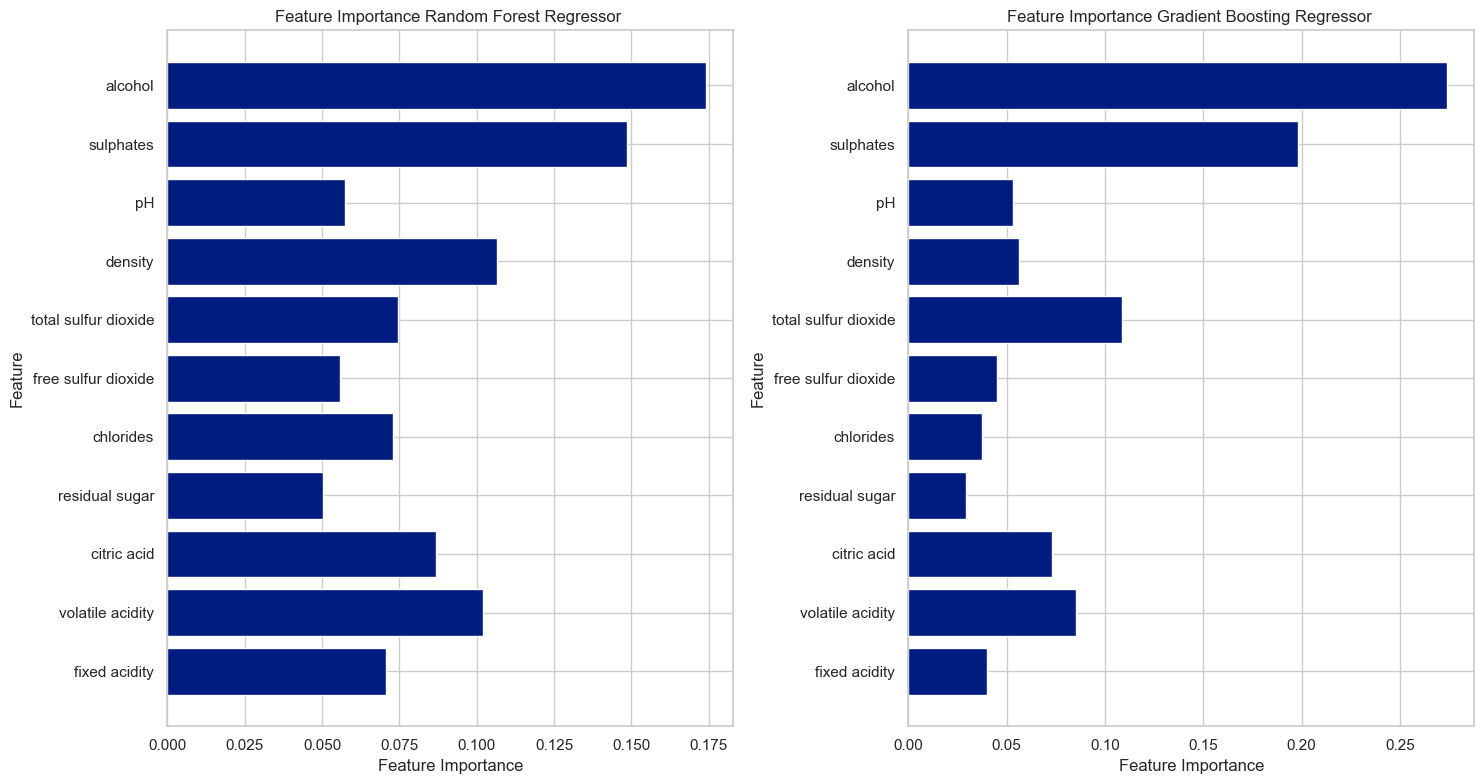

In [189]:
# Fit Random Forest Regressor
rf_regressor = RandomForestClassifier(max_depth = 20, max_features = 'log2', min_samples_leaf = 1, 
                    min_samples_split = 2, n_estimators = 300)
rf_regressor.fit(X_training, Y_training)

# Fit Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 4, min_samples_leaf = 4, 
                    min_samples_split = 2, n_estimators = 100)
gb_regressor.fit(X_training, Y_training)


column_names = X_testing.columns.tolist() 

# Plot feature importance for Random Forest Regressor
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.barh(range(X.shape[1]), rf_regressor.feature_importances_, align='center')
plt.yticks(np.arange(X_testing.shape[1]), column_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Random Forest Regressor ')

# Plot feature importance for Gradient Boosting Regressor
plt.subplot(1, 2, 2)
plt.barh(range(X.shape[1]), gb_regressor.feature_importances_, align='center')
plt.yticks(np.arange(X_testing.shape[1]), column_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Gradient Boosting Regressor ')

plt.tight_layout()
plt.show()

Plot the feature importance for "Random Forest Regressor" model and the "Gradient Boosting Regressor" model. 

Have slight variation, but top 4 features are the same: alcohol, volatile acidity, sulphates and citric acid.

### Conclusion

*TODO*

In conclusion, we wanted to create a predictive model in this project that would evaluate red wines according to several physicochemical characteristics. 

We looked for patterns and associations in the information that would provide light on the variables affecting wine quality. To do this, we used exploratory data analysis and machine learning approaches, to find the best algorithm for prediction future wine quality.